In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/jbonet/Desktop/EMIBA/BDP/data/albaranes_de_venta/datos_limipios/datos_columnas_reducidas_13Sep.tsv', sep='\t')

/home/jbonet/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

Cod_Grupo Numero_albaran Fecha_Albaran        Nombre_Comercial  \
0       38.0           7859    2019-08-27  COMERCIAL TILMAD, S.L.   
1       38.0           1962    2019-03-06  COMERCIAL TILMAD, S.L.   
2       38.0          11613    2018-12-18  COMERCIAL TILMAD, S.L.   
3       38.0           1949    2017-03-21  COMERCIAL TILMAD, S.L.   
4       38.0           2145    2017-03-28  COMERCIAL TILMAD, S.L.   

   Numero de Factura                                  Direccion Cliente  \
0            11171.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
1             3590.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
2            16755.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
3             3256.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
4             3256.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   

                 Documento Codigo de Articulo  \
0  2019/01/0007859/0000001                232   
1  2019/01/0001962/0000001                232   
2  2018/01/0011613/0000002                231   
3  2017/01/0001949/0000003               9002   
4  2017/01/0002145/0000004               9002   

                           Nombre Articulo  Cantidad Pedida  Precio Unitario  \
0                        BURRATA DA 250 GR             10.0             9.85   
1                        BURRATA DA 250 GR              6.0             9.85   
2                      BURRATINA DA 125 GR             40.0             9.85   
3  MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG             40.0             4.85   
4  MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG             50.0             4.85   

   Descuento aplicado  Total Producto (Cantidad x Precio x Dto)  \
0                0.00                                     98.50   
1                0.00                                     59.10   
2                0.00                                    394.00   
3               13.98                                    166.88   
4               13.98                                    208.60   

  Descripcion Familia de Articulo Descripcion Sub-Familia Articulos  \
0                          QUESOS                  BUFALA E BURRATA   
1                          QUESOS                  BUFALA E BURRATA   
2                          QUESOS                  BUFALA E BURRATA   
3                          QUESOS              MOZZARELLA PER PIZZA   
4                          QUESOS              MOZZARELLA PER PIZZA   

   Diferencia Caducidad Tipo de Producto  
0                  13.0     Ultra Fresco  
1                  13.0     Ultra Fresco  
2                  13.0     Ultra Fresco  
3                   0.0     Ultra Fresco  
4                   0.0     Ultra Fresco

In [4]:
df['year'] = pd.to_datetime(df['Fecha_Albaran']).dt.year
df['month'] = pd.to_datetime(df['Fecha_Albaran']).dt.month

In [5]:
df['Ground Truth'] = df['Precio Unitario'] * df['Cantidad Pedida']
df['Perdida Descuento'] = df['Ground Truth'] * df['Descuento aplicado'] / 100

In [6]:
df.head()

Cod_Grupo Numero_albaran Fecha_Albaran        Nombre_Comercial  \
0       38.0           7859    2019-08-27  COMERCIAL TILMAD, S.L.   
1       38.0           1962    2019-03-06  COMERCIAL TILMAD, S.L.   
2       38.0          11613    2018-12-18  COMERCIAL TILMAD, S.L.   
3       38.0           1949    2017-03-21  COMERCIAL TILMAD, S.L.   
4       38.0           2145    2017-03-28  COMERCIAL TILMAD, S.L.   

   Numero de Factura                                  Direccion Cliente  \
0            11171.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
1             3590.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
2            16755.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
3             3256.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
4             3256.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   

                 Documento Codigo de Articulo  \
0  2019/01/0007859/0000001                232   
1  2019/01/0001962/0000001                232   
2  2018/01/0011613/0000002                231   
3  2017/01/0001949/0000003               9002   
4  2017/01/0002145/0000004               9002   

                           Nombre Articulo  Cantidad Pedida  ...  \
0                        BURRATA DA 250 GR             10.0  ...   
1                        BURRATA DA 250 GR              6.0  ...   
2                      BURRATINA DA 125 GR             40.0  ...   
3  MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG             40.0  ...   
4  MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG             50.0  ...   

   Descuento aplicado  Total Producto (Cantidad x Precio x Dto)  \
0                0.00                                     98.50   
1                0.00                                     59.10   
2                0.00                                    394.00   
3               13.98                                    166.88   
4               13.98                                    208.60   

   Descripcion Familia de Articulo Descripcion Sub-Familia Articulos  \
0                           QUESOS                  BUFALA E BURRATA   
1                           QUESOS                  BUFALA E BURRATA   
2                           QUESOS                  BUFALA E BURRATA   
3                           QUESOS              MOZZARELLA PER PIZZA   
4                           QUESOS              MOZZARELLA PER PIZZA   

  Diferencia Caducidad  Tipo de Producto  year  month  Ground Truth  \
0                 13.0      Ultra Fresco  2019      8          98.5   
1                 13.0      Ultra Fresco  2019      3          59.1   
2                 13.0      Ultra Fresco  2018     12         394.0   
3                  0.0      Ultra Fresco  2017      3         194.0   
4                  0.0      Ultra Fresco  2017      3         242.5   

   Perdida Descuento  
0             0.0000  
1             0.0000  
2             0.0000  
3            27.1212  
4            33.9015  

[5 rows x 21 columns]

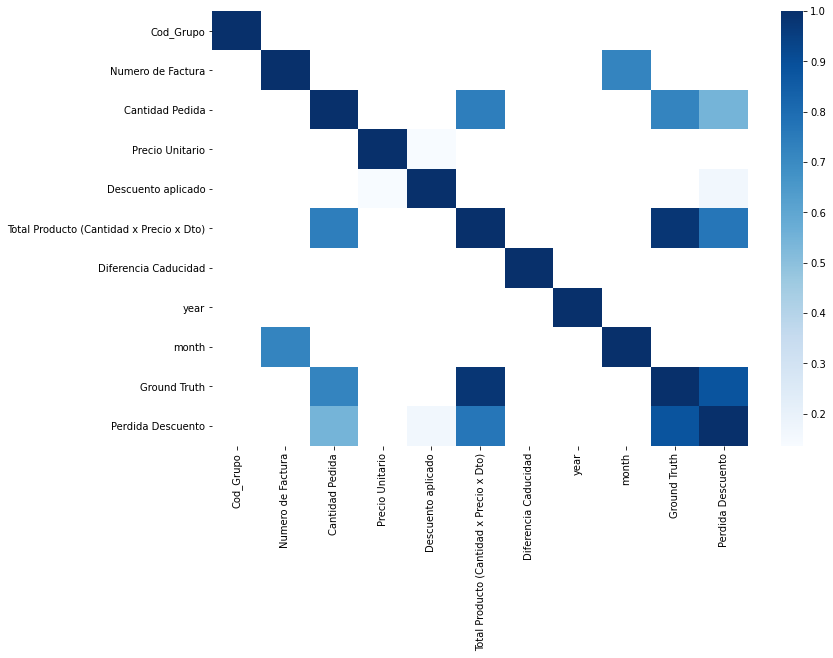

In [7]:
corr = df.corr()
kot = corr[corr>=0.1]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")
plt.show()

In [5]:
def group_discount_50(df):
    df_toplot = pd.DataFrame()
    for i, j in [(0,49), (50, 100)]:
        
        int_df = pd.DataFrame(df[(df['Descuento aplicado'] >= i) & \
            (df['Descuento aplicado'] <= j)].groupby(['Tipo de Producto', 'year']).apply(
                lambda x: x['Cantidad Pedida'].sum())).reset_index()
        
        int_df['Descuento'] = '{}-{}%'.format(i,j)
        df_toplot = pd.concat([df_toplot, int_df])

    rel_df = pd.DataFrame()
    for k, l in df_toplot.groupby(['Tipo de Producto', 'year']):
        l['Relative_counts'] = l[0] / df[(df['Tipo de Producto'] == k[0]) & (df['year'] == k[1])]['Cantidad Pedida'].sum()
        rel_df = pd.concat([rel_df, l])

    return rel_df

In [6]:
def analyze_products(df):
    df = df[df['Descuento aplicado'] >= 50]
    import pdb;pdb.set_trace()
    return df.groupby(['Tipo de Producto', 'Descripcion Sub-Familia Articulos']).apply(
        lambda x: x['Cantidad Pedida'].sum()).reset_index()

In [7]:
df_discount = group_discount_50(df)

/home/jbonet/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df_discount.head()

Tipo de Producto  year            0 Descuento  Relative_counts
0           Fresco  2015   942727.769     0-49%         0.997320
0           Fresco  2015     2475.515   50-100%         0.002619
1           Fresco  2016  1038366.762     0-49%         0.997707
1           Fresco  2016     2053.513   50-100%         0.001973
2           Fresco  2017  1110714.291     0-49%         0.996208

In [9]:
df_products = analyze_products(df)

In [41]:
df_products[df_products['Tipo de Producto'] == 'Fresco']

Tipo de Producto Descripcion Sub-Familia Articulos         0
0            Fresco        ALTRI FORMAGGI GRATTUGIATI     9.000
1            Fresco                             BIRRE    36.000
2            Fresco                        BOCCONCINI  4588.000
3            Fresco                  BUFALA E BURRATA  4434.250
4            Fresco                          CONSERVE    44.836
5            Fresco                            FARINE    10.000
6            Fresco                     FORMAGGI DURI   274.287
7            Fresco                  FORMAGGI MORBIDI  5953.918
8            Fresco               FORMAGGI SPECIALIT¿   719.891
9            Fresco               FORMAGGI SPECIALITÀ  1446.101
10           Fresco                FORMAGGI STRANIERI   207.908
11           Fresco              MOZZARELLA PER PIZZA  8227.000
12           Fresco              OTROS DERIVADO HORNO   532.200
13           Fresco                      PASTA FRESCA  9113.584
14           Fresco                       PASTA SECCA     9.000
15           Fresco                              RISO     4.000
16           Fresco                             SALSE    58.000
17           Fresco                   SALUMI ITALIANI  1610.170

In [19]:
def plot_products_discounted(df, output):

    sns.set(rc={'figure.figsize':(7,5)})
    sns.set_style('whitegrid')

    for i, j in df.groupby('Tipo de Producto'):
        j = j.sort_values(by=0, ascending=False)

        palette = sns.color_palette("Blues",n_colors=j.shape[0])
        palette.reverse()
        ax = sns.barplot(data=j, x=0, y='Descripcion Sub-Familia Articulos', palette=palette, orient='h')

        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        ax.set_xlabel("Cantidad de Producto", fontsize=12)
        ax.set_ylabel("Subfamilia de Producto", fontsize=12)
        
        plt.title(i, fontsize=20)
        plt.tight_layout()
        #plt.savefig('Discounted_products_{}.pdf'.format(i))
        #plt.close()
        plt.show()

In [20]:
df_products.head()

Tipo de Producto Descripcion Sub-Familia Articulos         0
0           Fresco        ALTRI FORMAGGI GRATTUGIATI     9.000
1           Fresco                             BIRRE    36.000
2           Fresco                        BOCCONCINI  4588.000
3           Fresco                  BUFALA E BURRATA  4434.250
4           Fresco                          CONSERVE    44.836

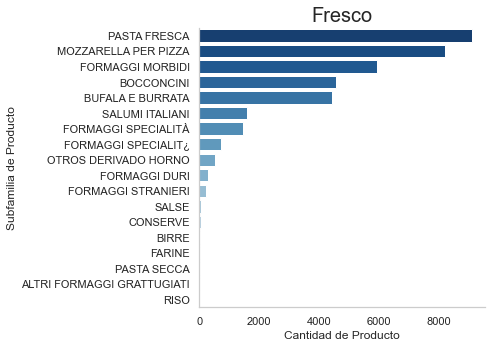

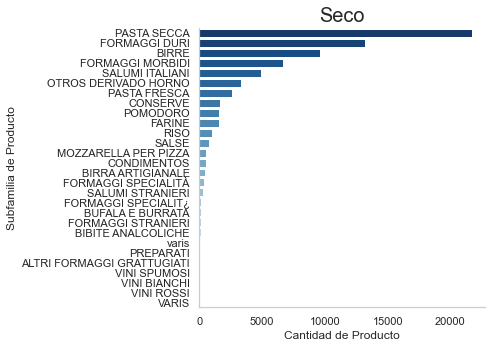

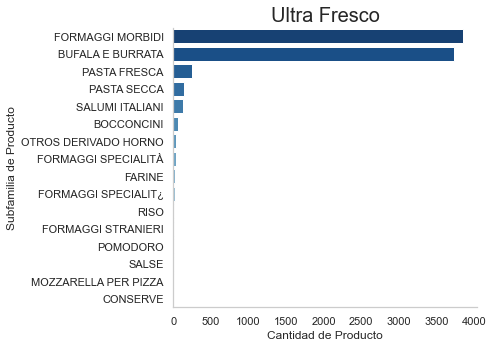

In [21]:
output = ''
plot_products_discounted(df_products, output)

In [112]:
def plot_evolution_discount(df, output):

    sns.set(rc={'figure.figsize':(7,5)})
    sns.set_style('whitegrid')

    for i, j in df.groupby('Descuento'):
        ax = sns.barplot(data=j, x='year', y='Relative_counts', 
            hue='Tipo de Producto', hue_order=['Seco', 'Fresco', 'Ultra Fresco'])

        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.tight_layout()
        plt.savefig('evolution_discount_{}.pdf'.format(i))
        plt.close()

In [113]:
plot_evolution_discount(df_discount, output)

In [117]:
df[df['Diferencia Caducidad'] < 0].iloc[0]

Cod_Grupo                                                                                  38
Numero_albaran                                                                           7921
Fecha_Albaran                                                                      2016-10-25
Nombre_Comercial                                                       COMERCIAL TILMAD, S.L.
Numero de Factura                                                                       11363
Direccion Cliente                           000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...
Documento                                                             2016/01/0007921/0000005
Codigo de Articulo                                                                        846
Nombre Articulo                                                RICOTTA IN VASCHETTA DA 1.5 KG
Cantidad Pedida                                                                             3
Precio Unitario                                             

In [121]:
df[df['Diferencia Caducidad'] > 3000].shape

(133, 18)

In [122]:
df.isna().sum()

Cod_Grupo                                       0
Numero_albaran                                  0
Fecha_Albaran                                   0
Nombre_Comercial                             5092
Numero de Factura                           16000
Direccion Cliente                               0
Documento                                       0
Codigo de Articulo                              0
Nombre Articulo                                 5
Cantidad Pedida                                 0
Precio Unitario                                 0
Descuento aplicado                              0
Total Producto (Cantidad x Precio x Dto)        0
Descripcion Familia de Articulo                 0
Descripcion Sub-Familia Articulos               0
Diferencia Caducidad                            0
Tipo de Producto                                0
year                                            0
dtype: int64

In [23]:
df.shape

(1296226, 18)

In [24]:
df.head()

Cod_Grupo Numero_albaran Fecha_Albaran        Nombre_Comercial  \
0       38.0           7859    2019-08-27  COMERCIAL TILMAD, S.L.   
1       38.0           1962    2019-03-06  COMERCIAL TILMAD, S.L.   
2       38.0          11613    2018-12-18  COMERCIAL TILMAD, S.L.   
3       38.0           1949    2017-03-21  COMERCIAL TILMAD, S.L.   
4       38.0           2145    2017-03-28  COMERCIAL TILMAD, S.L.   

   Numero de Factura                                  Direccion Cliente  \
0            11171.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
1             3590.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
2            16755.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
3             3256.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
4             3256.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   

                 Documento Codigo de Articulo  \
0  2019/01/0007859/0000001                232   
1  2019/01/0001962/0000001                232   
2  2018/01/0011613/0000002                231   
3  2017/01/0001949/0000003               9002   
4  2017/01/0002145/0000004               9002   

                           Nombre Articulo  Cantidad Pedida  Precio Unitario  \
0                        BURRATA DA 250 GR             10.0             9.85   
1                        BURRATA DA 250 GR              6.0             9.85   
2                      BURRATINA DA 125 GR             40.0             9.85   
3  MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG             40.0             4.85   
4  MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG             50.0             4.85   

   Descuento aplicado  Total Producto (Cantidad x Precio x Dto)  \
0                0.00                                     98.50   
1                0.00                                     59.10   
2                0.00                                    394.00   
3               13.98                                    166.88   
4               13.98                                    208.60   

  Descripcion Familia de Articulo Descripcion Sub-Familia Articulos  \
0                          QUESOS                  BUFALA E BURRATA   
1                          QUESOS                  BUFALA E BURRATA   
2                          QUESOS                  BUFALA E BURRATA   
3                          QUESOS              MOZZARELLA PER PIZZA   
4                          QUESOS              MOZZARELLA PER PIZZA   

   Diferencia Caducidad Tipo de Producto  year  
0                  13.0     Ultra Fresco  2019  
1                  13.0     Ultra Fresco  2019  
2                  13.0     Ultra Fresco  2018  
3                   0.0     Ultra Fresco  2017  
4                   0.0     Ultra Fresco  2017

In [8]:
df.columns

Index(['Cod_Grupo', 'Numero_albaran', 'Fecha_Albaran', 'Nombre_Comercial',
       'Numero de Factura', 'Direccion Cliente', 'Documento',
       'Codigo de Articulo', 'Nombre Articulo', 'Cantidad Pedida',
       'Precio Unitario', 'Descuento aplicado',
       'Total Producto (Cantidad x Precio x Dto)',
       'Descripcion Familia de Articulo', 'Descripcion Sub-Familia Articulos',
       'Diferencia Caducidad', 'Tipo de Producto', 'year', 'month',
       'Ground Truth', 'Perdida Descuento'],
      dtype='object')

In [9]:
df_low_disc = df[df['Descuento aplicado'] < 50]
df_high_disc = df[df['Descuento aplicado'] >= 50]

Search for products that have high error in the number sales

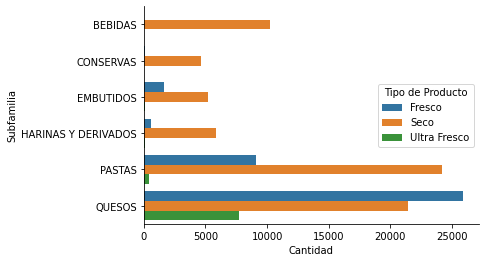

In [10]:
df_high_cant = df_high_disc.groupby(['Tipo de Producto', 'Descripcion Familia de Articulo']).apply(
        lambda x: x['Cantidad Pedida'].sum()).reset_index()

ax = sns.barplot(data=df_high_cant, x=0, y='Descripcion Familia de Articulo', hue='Tipo de Producto')

ax.set_xlabel("Cantidad")
ax.set_ylabel("Subfamilia")
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

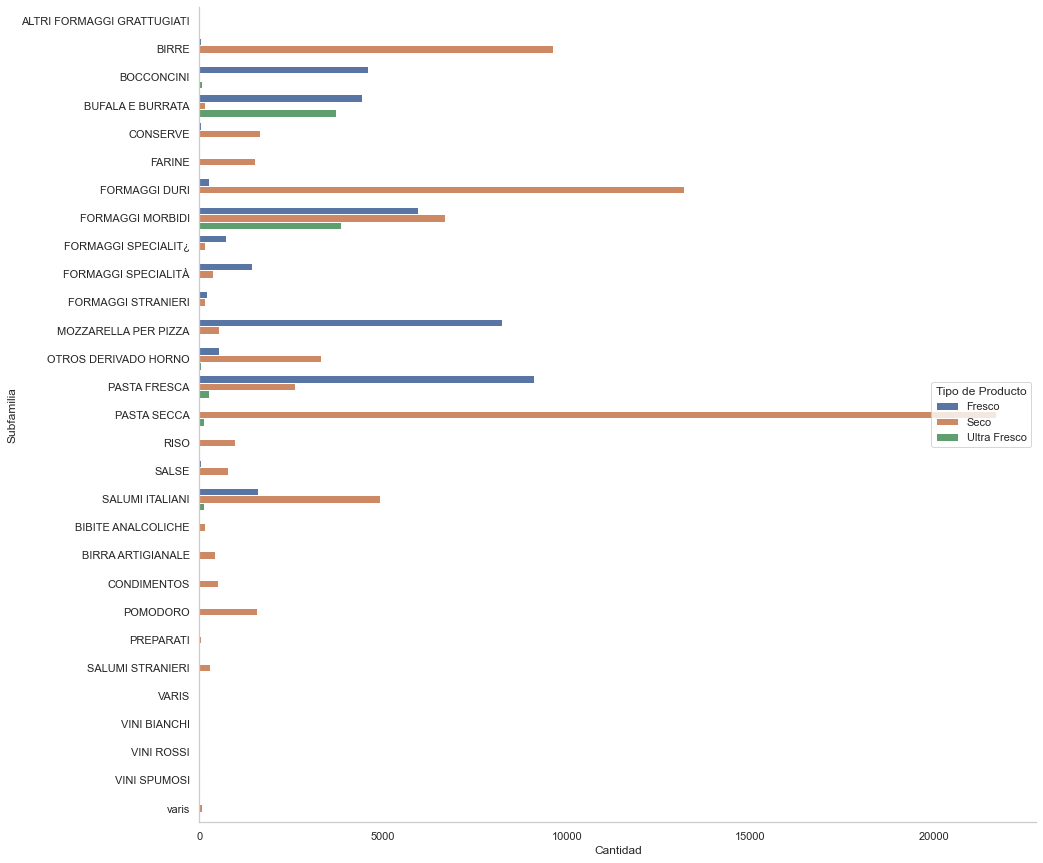

In [11]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set_style('whitegrid')

df_high_cant = df_high_disc.groupby(['Tipo de Producto', 'Descripcion Sub-Familia Articulos']).apply(
        lambda x: x['Cantidad Pedida'].sum()).reset_index()

ax = sns.barplot(data=df_high_cant, x=0, y='Descripcion Sub-Familia Articulos', hue='Tipo de Producto')

ax.set_xlabel("Cantidad")
ax.set_ylabel("Subfamilia")
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Search for products that have a error and high monetary impact

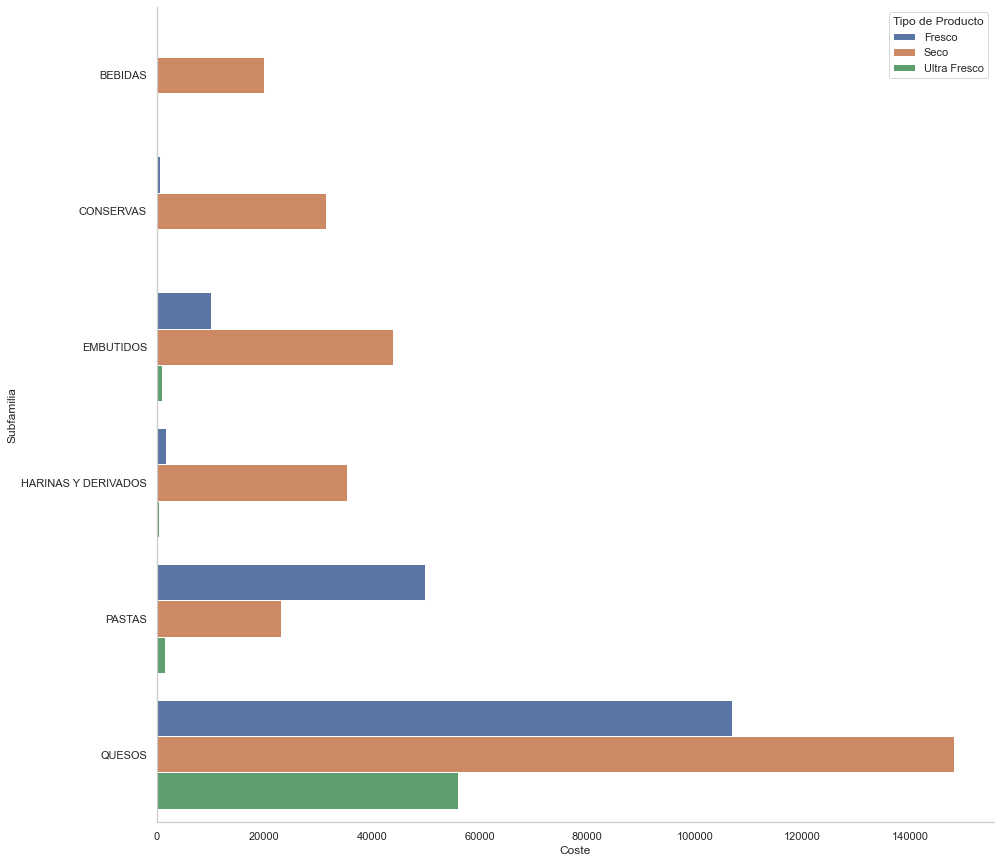

In [12]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set_style('whitegrid')

df_high_tot= df_high_disc.groupby(['Tipo de Producto', 'Descripcion Familia de Articulo']).apply(
        lambda x: x['Perdida Descuento'].sum()).reset_index()

ax = sns.barplot(data=df_high_tot, x=0, y='Descripcion Familia de Articulo', hue='Tipo de Producto')

ax.set_xlabel("Coste")
ax.set_ylabel("Subfamilia")
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

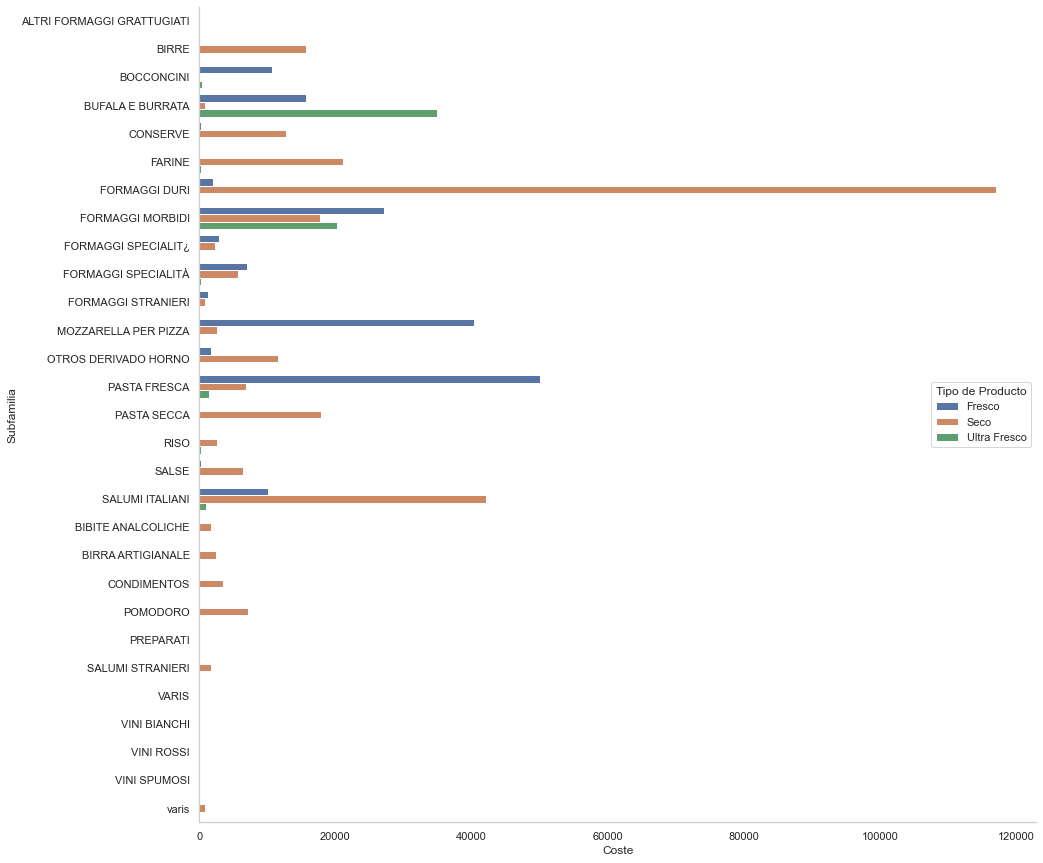

In [13]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set_style('whitegrid')

df_high_tot= df_high_disc.groupby(['Tipo de Producto', 'Descripcion Sub-Familia Articulos']).apply(
        lambda x: x['Perdida Descuento'].sum()).reset_index()

ax = sns.barplot(data=df_high_tot, x=0, y='Descripcion Sub-Familia Articulos', hue='Tipo de Producto')

ax.set_xlabel("Coste")
ax.set_ylabel("Subfamilia")
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [14]:
df_high_disc['Total Producto (Cantidad x Precio x Dto)'].sum()

338046.73000000004

In [15]:
df['Total Producto (Cantidad x Precio x Dto)'].sum()

53557462.269999996

In [16]:
print( 'This is the max monetary impact we can directly have:', np.int(df_high_disc['Perdida Descuento'].sum()), 'Euros')

This is the max monetary impact we can directly have: 530210 Euros


Select products that have the biggest monetary impact

In [17]:
formaggi_duri = df[df['Descripcion Sub-Familia Articulos'] == 'FORMAGGI DURI']
bufala_e_burrata = df[df['Descripcion Sub-Familia Articulos'] == 'BUFALA E BURRATA']
pasta_fresca = df[df['Descripcion Sub-Familia Articulos'] == 'PASTA FRESCA']
salumi_italiani = df[df['Descripcion Sub-Familia Articulos'] == 'SALUMI ITALIANI']
formaggi_morbidi = df[df['Descripcion Sub-Familia Articulos'] == 'FORMAGGI MORBIDI']
mozzarella_per_pizza = df[df['Descripcion Sub-Familia Articulos'] == 'MOZZARELLA PER PIZZA']

Time series for total product for all high impact products

FORMAGGI DURI


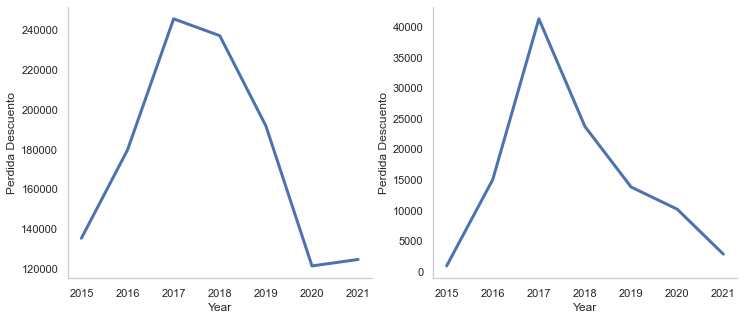

BUFALA E BURRATA


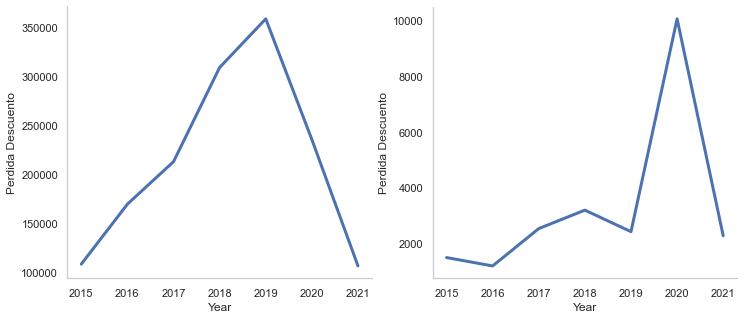

PASTA FRESCA


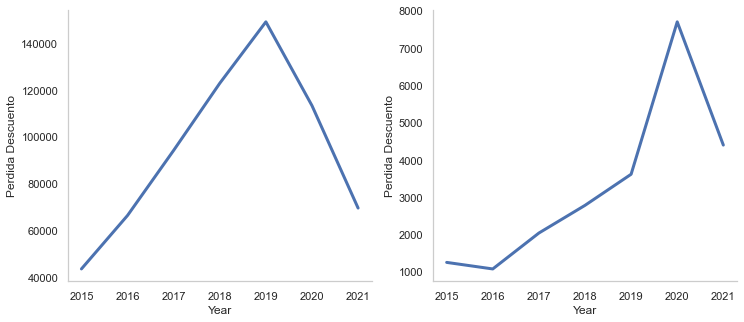

SALUMI ITALIANI


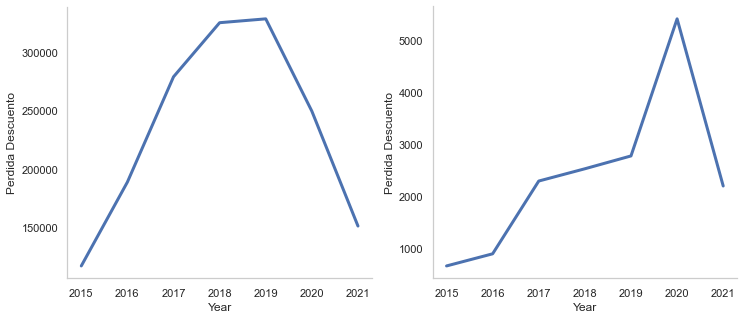

FORMAGGI MORBIDI


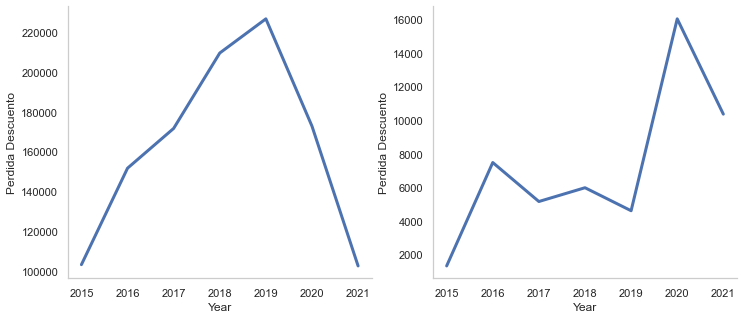

MOZZARELLA PER PIZZA


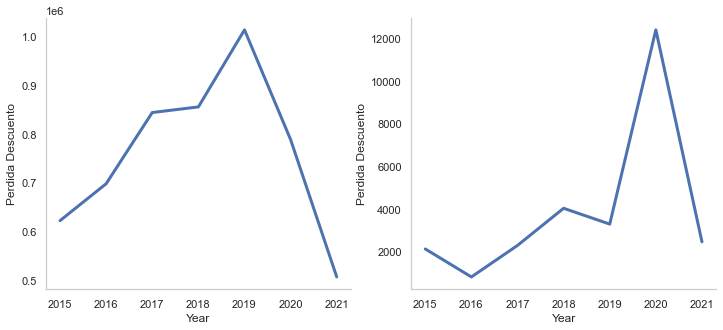

In [18]:
for el in [formaggi_duri, bufala_e_burrata, pasta_fresca, salumi_italiani, formaggi_morbidi, mozzarella_per_pizza]:
    print(el['Descripcion Sub-Familia Articulos'].unique()[0])
    el_dis = el[el['Descuento aplicado'] > 50]

    fig, ax = plt.subplots(figsize=(12, 5), facecolor='white', nrows=1, ncols=2)

    df_tot = el.groupby(['year']).apply(
            lambda x: x['Perdida Descuento'].sum()).reset_index()

    df_tot_dis = el_dis.groupby(['year']).apply(
            lambda x: x['Perdida Descuento'].sum()).reset_index()

    ax[0].plot(df_tot['year'].values, df_tot[0].values, lw=3)
    ax[1].plot(df_tot_dis['year'].values, df_tot_dis[0].values, lw=3)

    for el in [0, 1]:
        ax[el].set_ylabel("Perdida Descuento")
        ax[el].set_xlabel("Year")
        ax[el].grid(False)
        ax[el].spines['top'].set_visible(False)
        ax[el].spines['right'].set_visible(False)
    plt.show()

Relative time series of impact products on the total product cost

FORMAGGI DURI


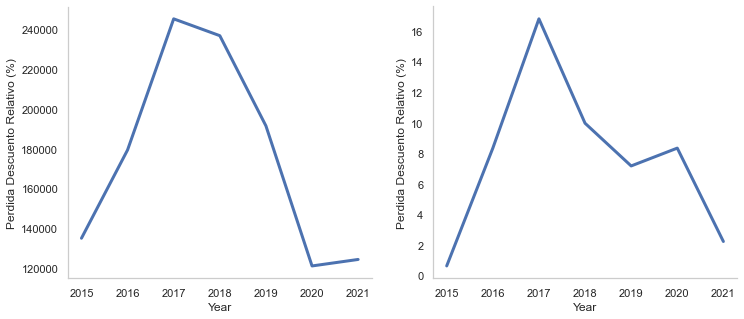

BUFALA E BURRATA


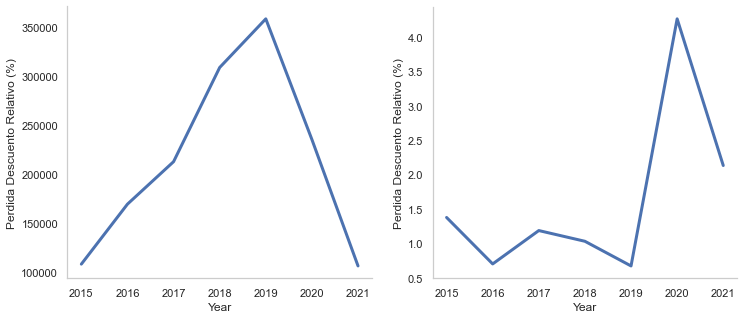

PASTA FRESCA


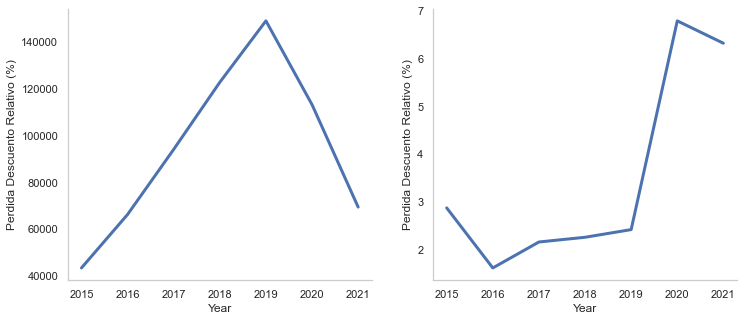

SALUMI ITALIANI


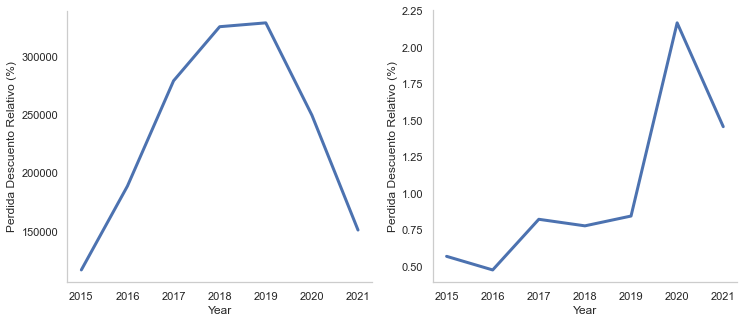

FORMAGGI MORBIDI


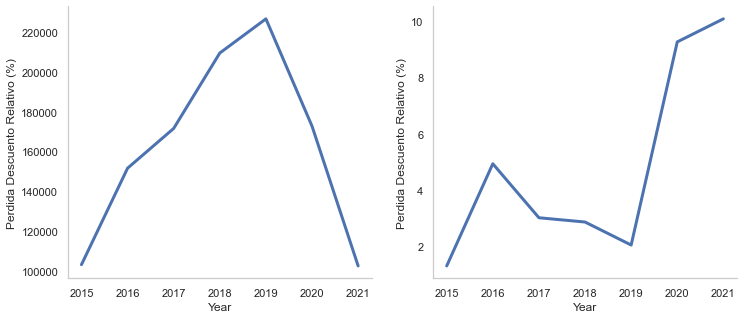

MOZZARELLA PER PIZZA


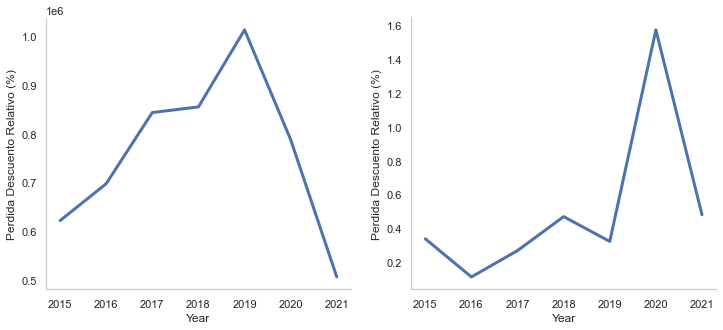

In [19]:
for el in [formaggi_duri, bufala_e_burrata, pasta_fresca, salumi_italiani, formaggi_morbidi, mozzarella_per_pizza]:
    print(el['Descripcion Sub-Familia Articulos'].unique()[0])
    el_dis = el[el['Descuento aplicado'] > 50]

    fig, ax = plt.subplots(figsize=(12, 5), facecolor='white', nrows=1, ncols=2)

    df_tot = el.groupby(['year']).apply(
            lambda x: x['Perdida Descuento'].sum()).reset_index()
    
    df_tot_dis = el_dis.groupby(['year']).apply(
            lambda x: x['Perdida Descuento'].sum()).reset_index()
    
    df_tot_dis ['Relative'] = df_tot_dis[0] / df_tot[0] * 100
    
    ax[0].plot(df_tot['year'].values, df_tot[0].values, lw=3)
    ax[1].plot(df_tot_dis['year'].values, df_tot_dis['Relative'].values, lw=3)

    for el in [0, 1]:
        ax[el].set_ylabel("Perdida Descuento Relativo (%)")
        ax[el].set_xlabel("Year")
        ax[el].grid(False)
        ax[el].spines['top'].set_visible(False)
        ax[el].spines['right'].set_visible(False)
    plt.show()

Time series for ordered amount of all high impact products

FORMAGGI DURI


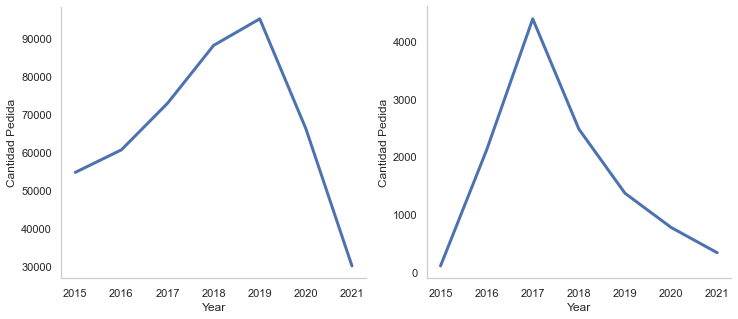

BUFALA E BURRATA


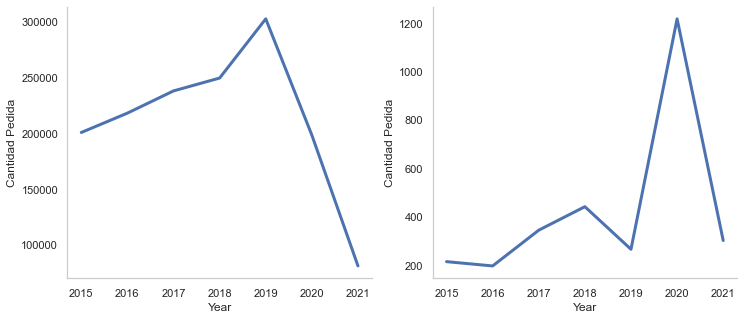

PASTA FRESCA


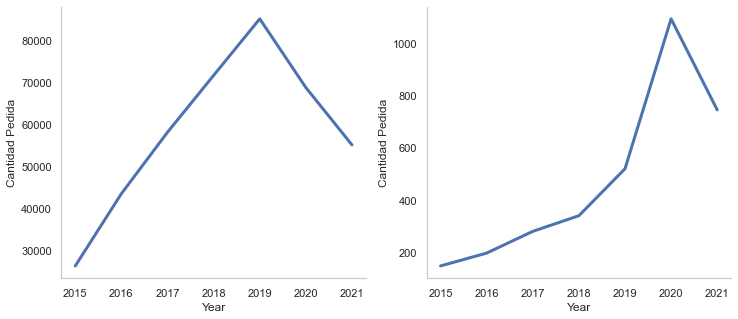

SALUMI ITALIANI


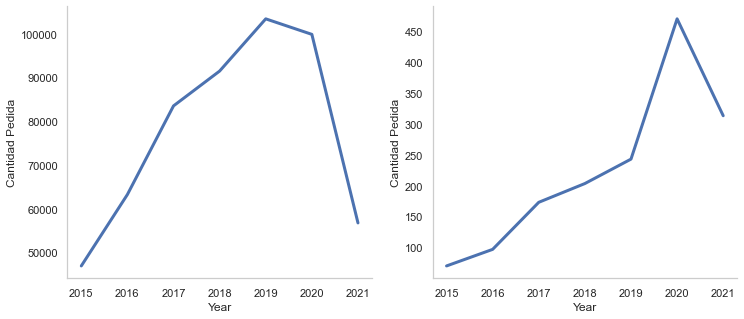

FORMAGGI MORBIDI


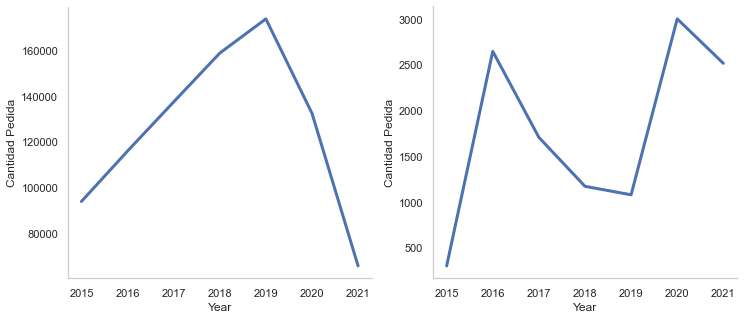

MOZZARELLA PER PIZZA


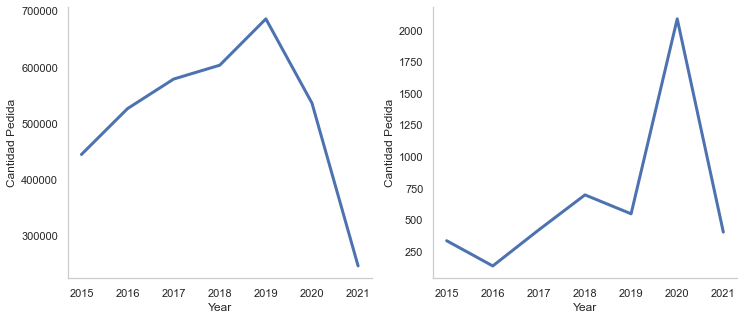

In [20]:
for el in [formaggi_duri, bufala_e_burrata, pasta_fresca, salumi_italiani, formaggi_morbidi, mozzarella_per_pizza]:
    print(el['Descripcion Sub-Familia Articulos'].unique()[0])
    el_dis = el[el['Descuento aplicado'] > 50]

    fig, ax = plt.subplots(figsize=(12, 5), facecolor='white', nrows=1, ncols=2)

    df_tot = el.groupby(['year']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()

    df_tot_dis = el_dis.groupby(['year']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()

    ax[0].plot(df_tot['year'].values, df_tot[0].values, lw=3)
    ax[1].plot(df_tot_dis['year'].values, df_tot_dis[0].values, lw=3)

    for el in [0, 1]:
        ax[el].set_ylabel("Cantidad Pedida")
        ax[el].set_xlabel("Year")
        ax[el].grid(False)
        ax[el].spines['top'].set_visible(False)
        ax[el].spines['right'].set_visible(False)
    plt.show()

Relative time series of impact products on the amount of sales

FORMAGGI DURI


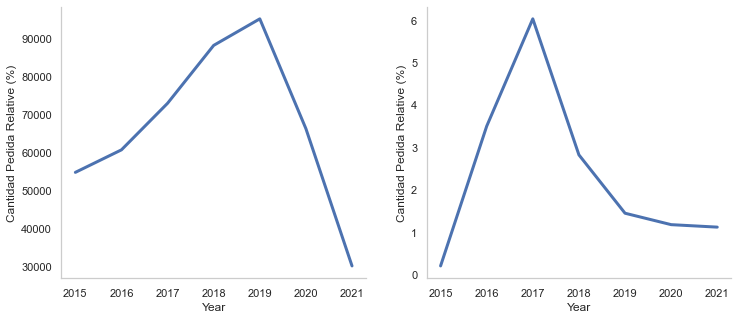

BUFALA E BURRATA


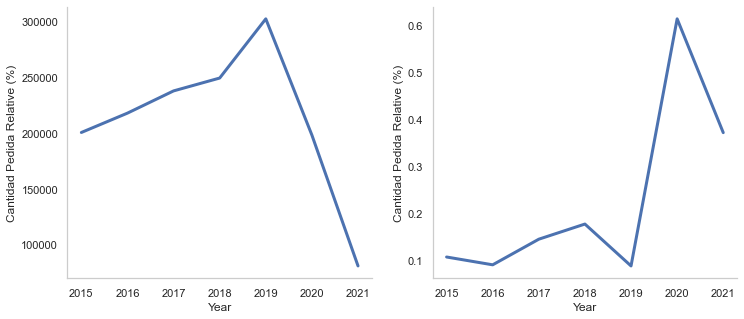

PASTA FRESCA


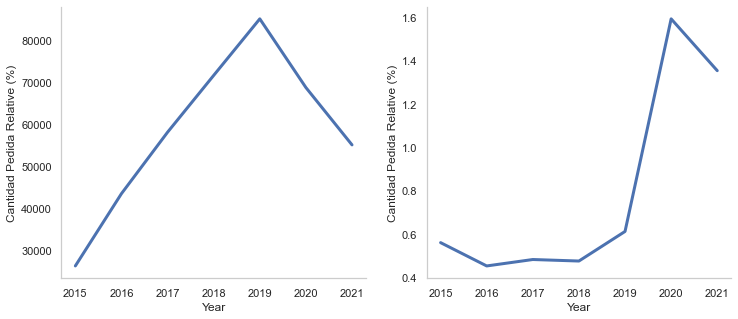

SALUMI ITALIANI


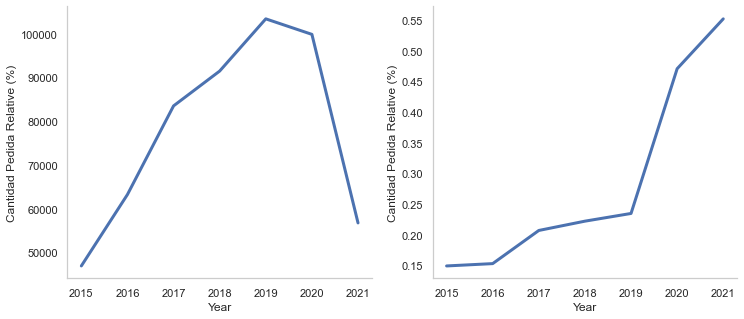

FORMAGGI MORBIDI


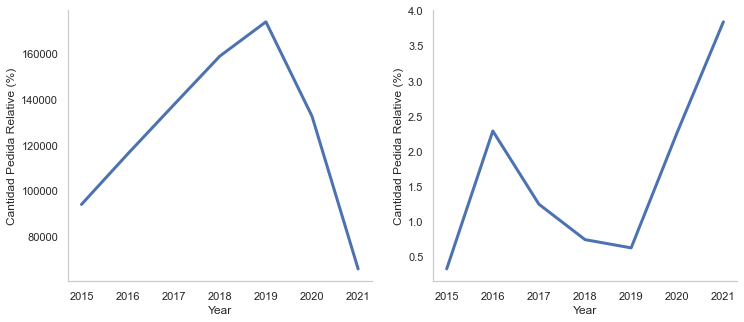

MOZZARELLA PER PIZZA


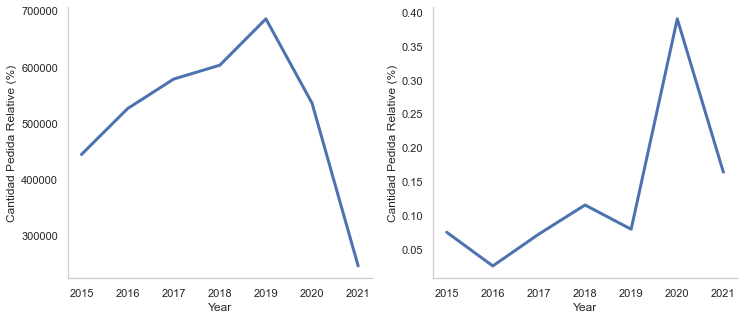

In [21]:
for el in [formaggi_duri, bufala_e_burrata, pasta_fresca, salumi_italiani, formaggi_morbidi, mozzarella_per_pizza]:
    print(el['Descripcion Sub-Familia Articulos'].unique()[0])
    el_dis = el[el['Descuento aplicado'] > 50]

    fig, ax = plt.subplots(figsize=(12, 5), facecolor='white', nrows=1, ncols=2)

    df_tot = el.groupby(['year']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()
    
    df_tot_dis = el_dis.groupby(['year']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()
    
    df_tot_dis ['Relative'] = df_tot_dis[0] / df_tot[0] * 100
    
    ax[0].plot(df_tot['year'].values, df_tot[0].values, lw=3)
    ax[1].plot(df_tot_dis['year'].values, df_tot_dis['Relative'].values, lw=3)

    for el in [0, 1]:
        ax[el].set_ylabel("Cantidad Pedida Relative (%)")
        ax[el].set_xlabel("Year")
        ax[el].grid(False)
        ax[el].spines['top'].set_visible(False)
        ax[el].spines['right'].set_visible(False)
    plt.show()

Look at monthly time series on all the data for every product

FORMAGGI DURI


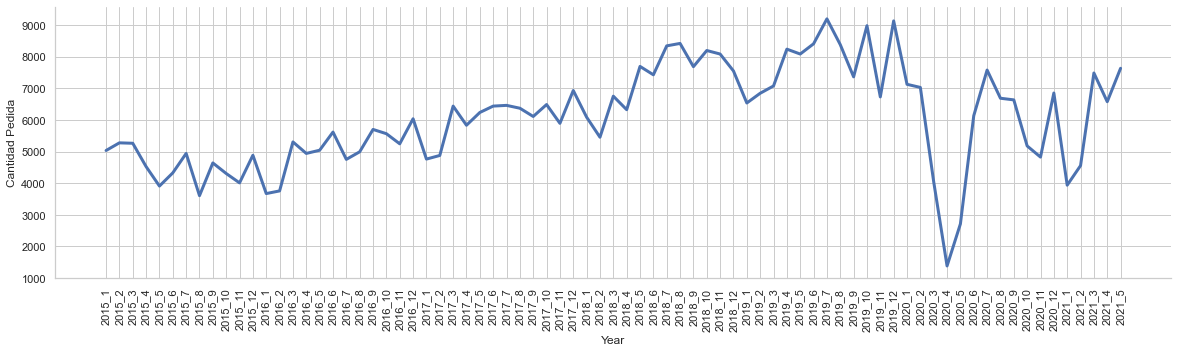

BUFALA E BURRATA


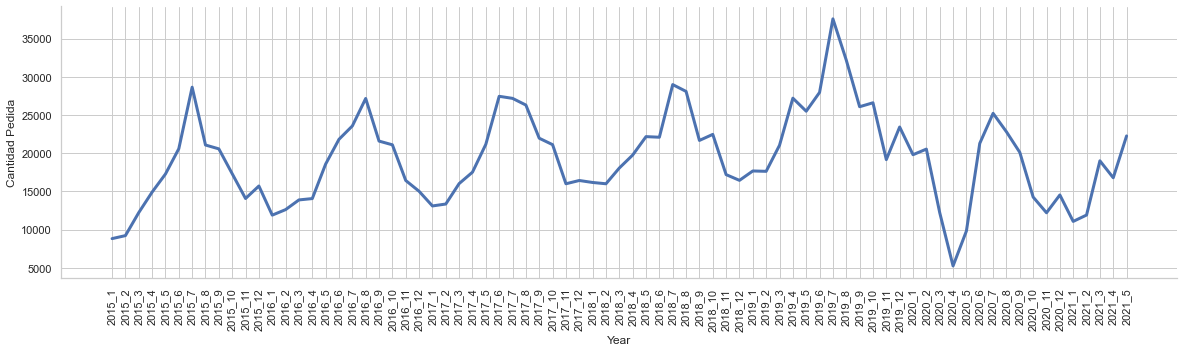

PASTA FRESCA


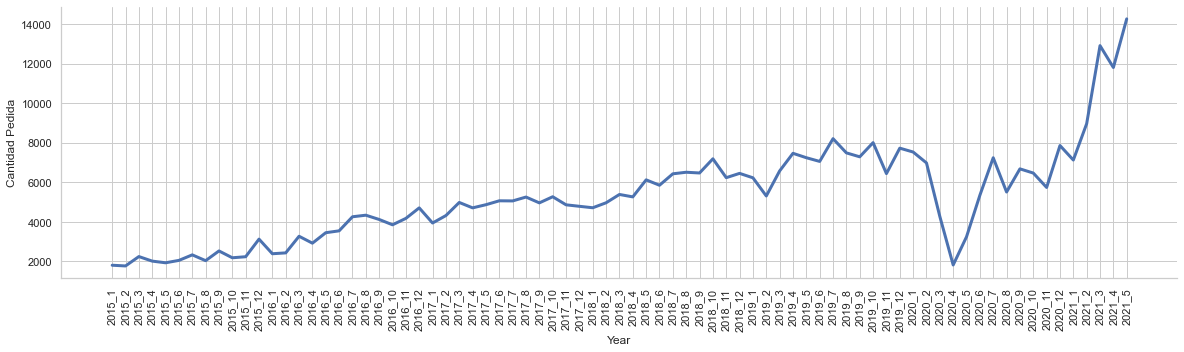

SALUMI ITALIANI


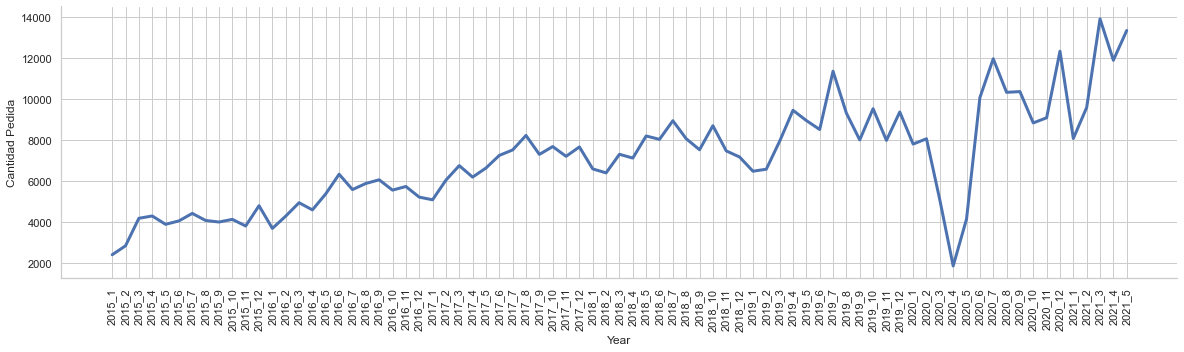

FORMAGGI MORBIDI


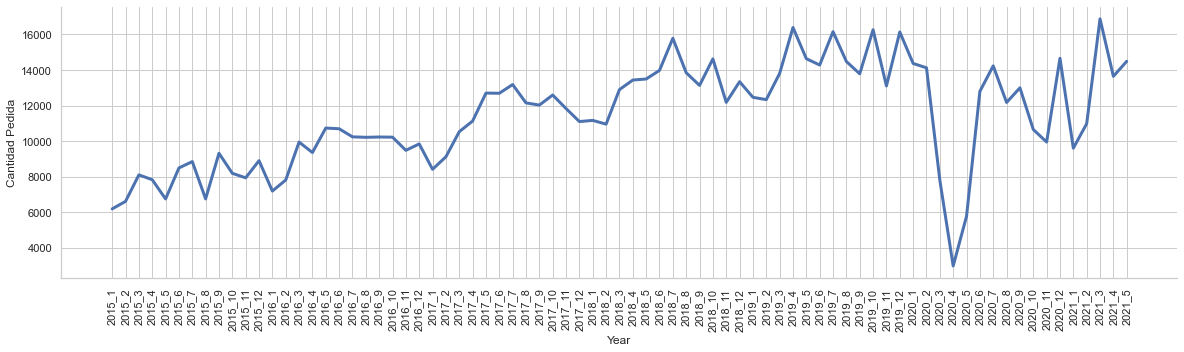

MOZZARELLA PER PIZZA


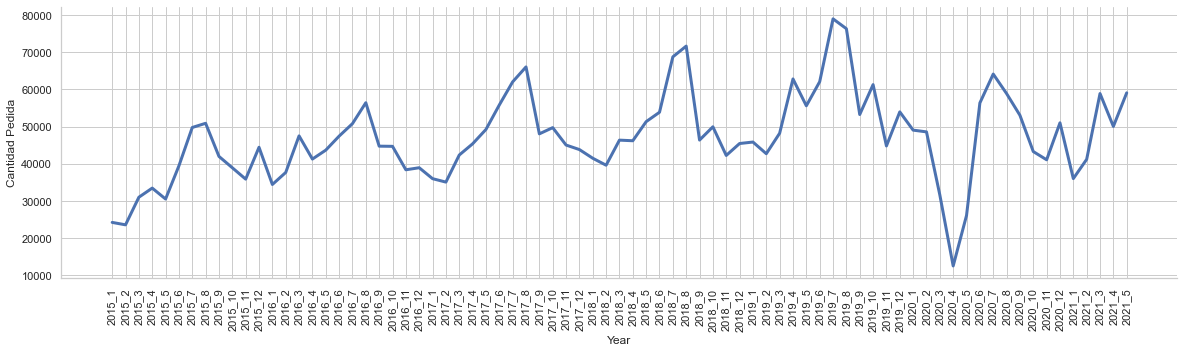

In [22]:
for el in [formaggi_duri, bufala_e_burrata, pasta_fresca, salumi_italiani, formaggi_morbidi, mozzarella_per_pizza]:
    print(el['Descripcion Sub-Familia Articulos'].unique()[0])
    el_dis = el[el['Descuento aplicado'] > 50]

    fig, ax = plt.subplots(figsize=(20, 5), facecolor='white')

    df_tot = el.groupby(['year', 'month']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()
    
    df_tot['year_month'] = df_tot['year'].astype(str) + '_' + df_tot['month'].astype(str)
    
    ax.plot(df_tot['year_month'].astype(str).tolist(), df_tot[0].values, lw=3)
    
    ax.set_ylabel("Cantidad Pedida")
    ax.set_xlabel("Year")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xticks(rotation='vertical')
    plt.show()
    

Monthly time series on the discount

FORMAGGI DURI


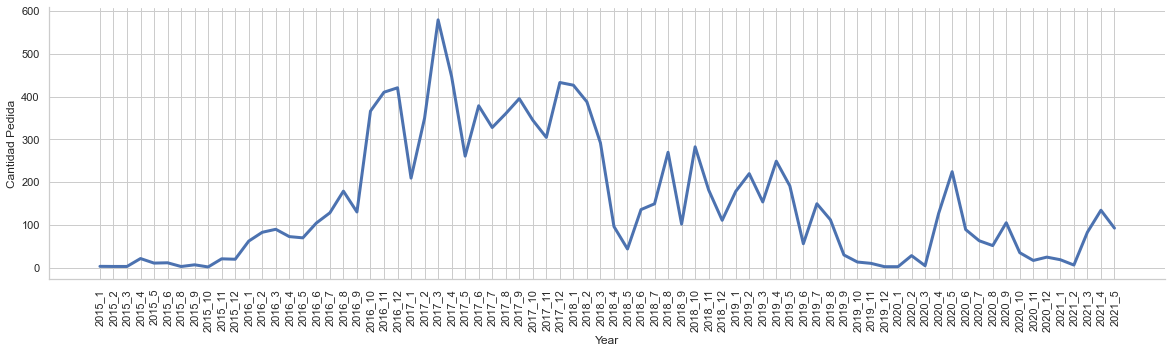

BUFALA E BURRATA


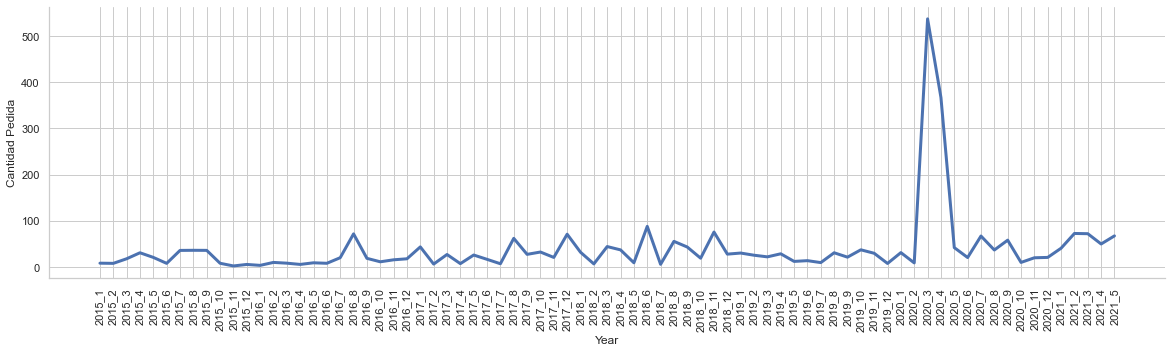

PASTA FRESCA


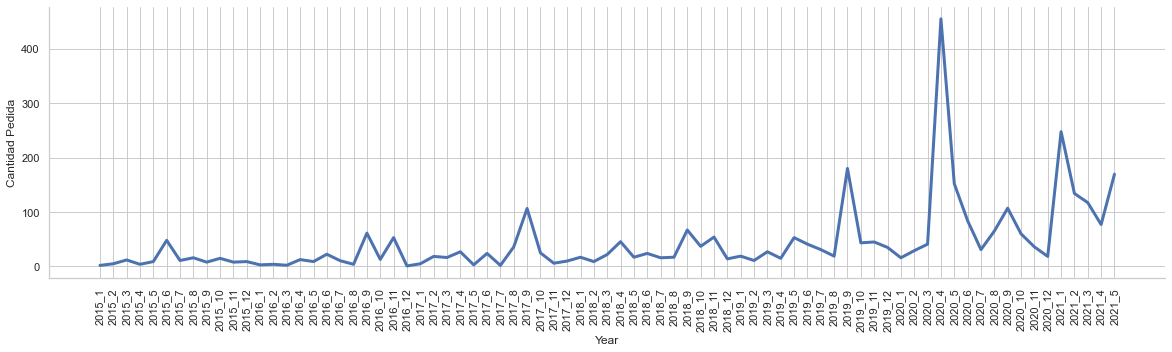

SALUMI ITALIANI


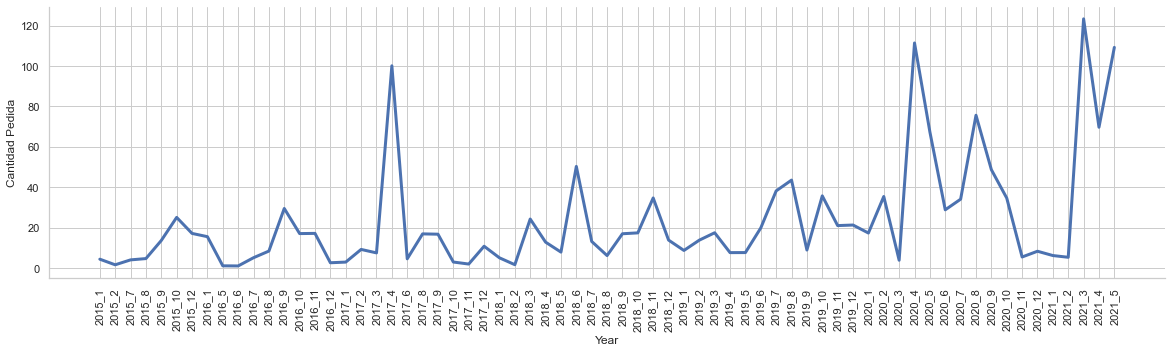

FORMAGGI MORBIDI


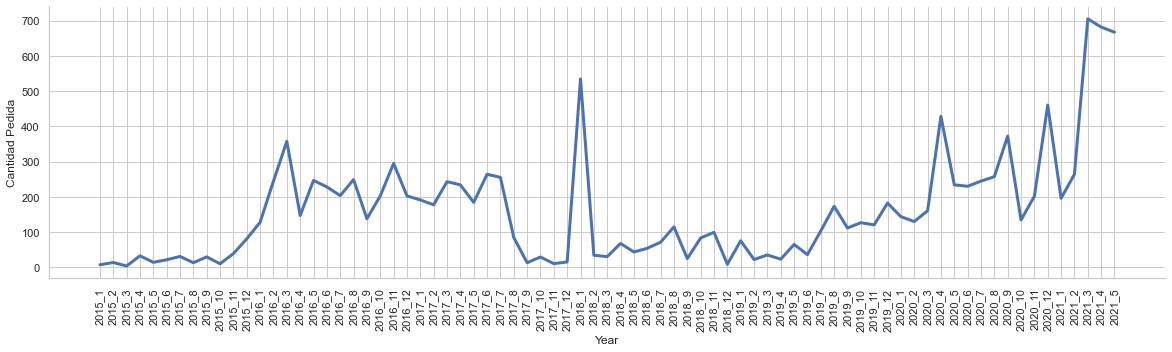

MOZZARELLA PER PIZZA


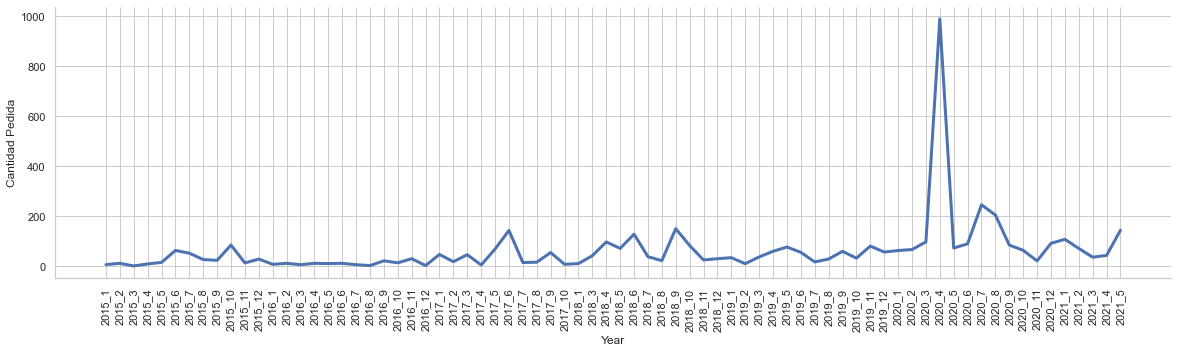

In [23]:
for el in [formaggi_duri, bufala_e_burrata, pasta_fresca, salumi_italiani, formaggi_morbidi, mozzarella_per_pizza]:
    print(el['Descripcion Sub-Familia Articulos'].unique()[0])
    el_dis = el[el['Descuento aplicado'] > 50]

    fig, ax = plt.subplots(figsize=(20, 5), facecolor='white')

    df_tot = el_dis.groupby(['year', 'month']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()
    
    df_tot['year_month'] = df_tot['year'].astype(str) + '_' + df_tot['month'].astype(str)
    
    ax.plot(df_tot['year_month'].astype(str).tolist(), df_tot[0].values, lw=3)
    
    ax.set_ylabel("Cantidad Pedida")
    ax.set_xlabel("Year")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xticks(rotation='vertical')
    plt.show()

Re-do time series without the months of March to June based on what we have seen

In [8]:
df_filt = df[(df['year'] != 2020) & (df['year'] != 2021)]

In [9]:
formaggi_duri_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'FORMAGGI DURI']
bufala_e_burrata_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'BUFALA E BURRATA']
pasta_fresca_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'PASTA FRESCA']
salumi_italiani_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'SALUMI ITALIANI']
formaggi_morbidi_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'FORMAGGI MORBIDI']
mozzarella_per_pizza_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'MOZZARELLA PER PIZZA']

FORMAGGI DURI


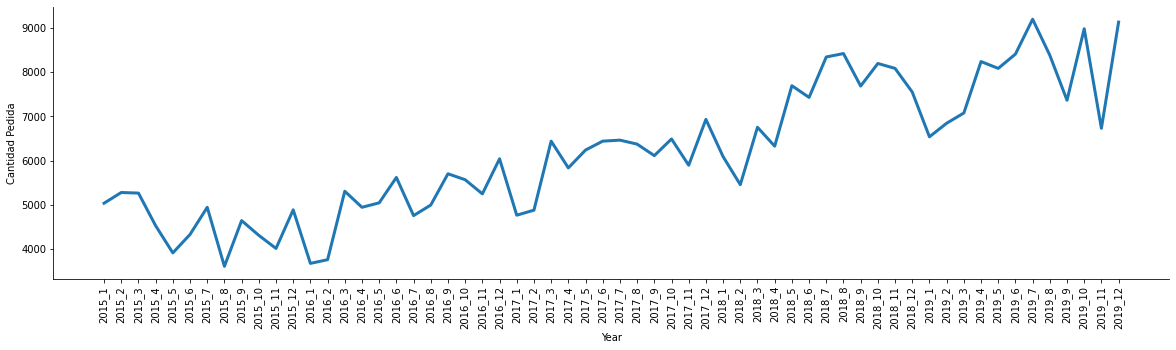

BUFALA E BURRATA


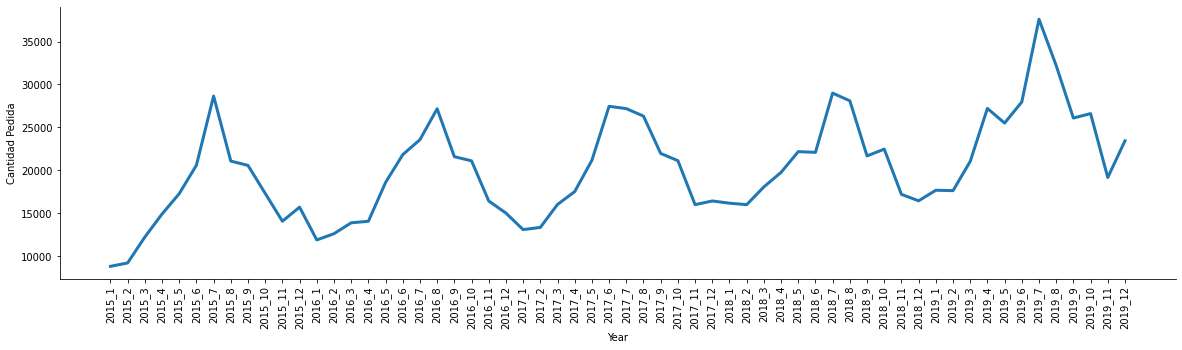

PASTA FRESCA


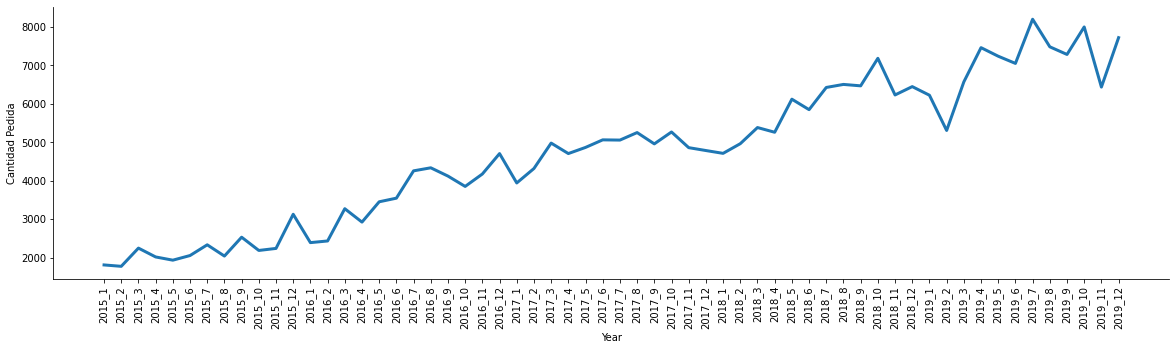

SALUMI ITALIANI


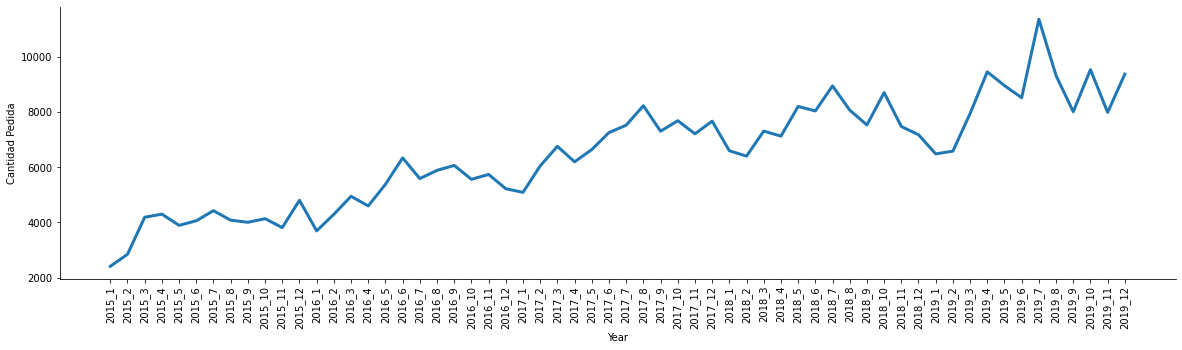

FORMAGGI MORBIDI


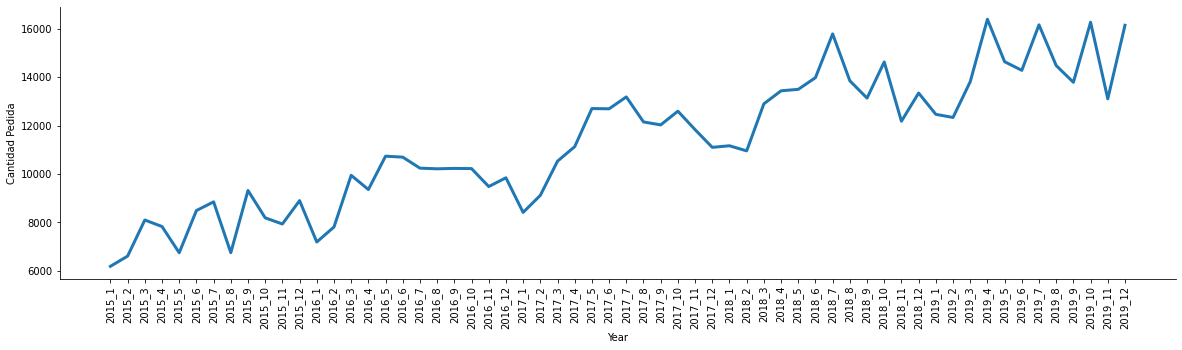

MOZZARELLA PER PIZZA


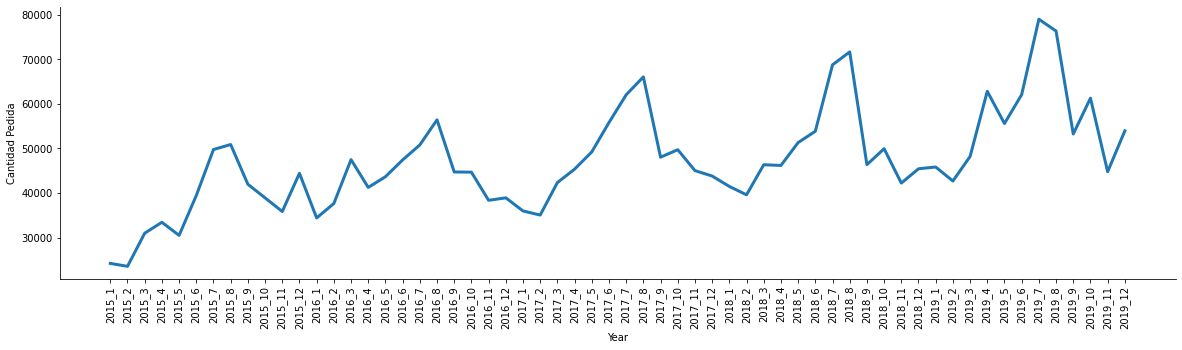

In [10]:
for el in [formaggi_duri_filt, bufala_e_burrata_filt, pasta_fresca_filt, salumi_italiani_filt, formaggi_morbidi_filt, mozzarella_per_pizza_filt]:
    print(el['Descripcion Sub-Familia Articulos'].unique()[0])
    el_dis = el[el['Descuento aplicado'] >= 50]

    fig, ax = plt.subplots(figsize=(20, 5), facecolor='white')

    df_tot = el.groupby(['year', 'month']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()
    
    df_tot['year_month'] = df_tot['year'].astype(str) + '_' + df_tot['month'].astype(str)
    
    ax.plot(df_tot['year_month'].astype(str).tolist(), df_tot[0].values, lw=3)
    
    ax.set_ylabel("Cantidad Pedida")
    ax.set_xlabel("Year")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xticks(rotation='vertical')
    plt.show()

What else is needed? 

1.- Start with forecasting some of those products? 

2.- Is the filtering of covid good enough? Delete everything after (maybe 2019 for test)

3.- what is exactly used for forecasting? Only the proper sales without discount? 

4.- Change column with the real impact of the discoun (which is not the total product)

Ground truth --> ideal que se tendría que haber vendido 

Serie a batir --> serie temporal de lo que ha ocurrido

skforecast & statsmodel

simular el escenario que se propone con la predicción. Puedes cada mes simular la prediccion de los siguientes meses

In [12]:
from sklearn.metrics import mean_squared_error

FORMAGGI DURI
249.9584093763733


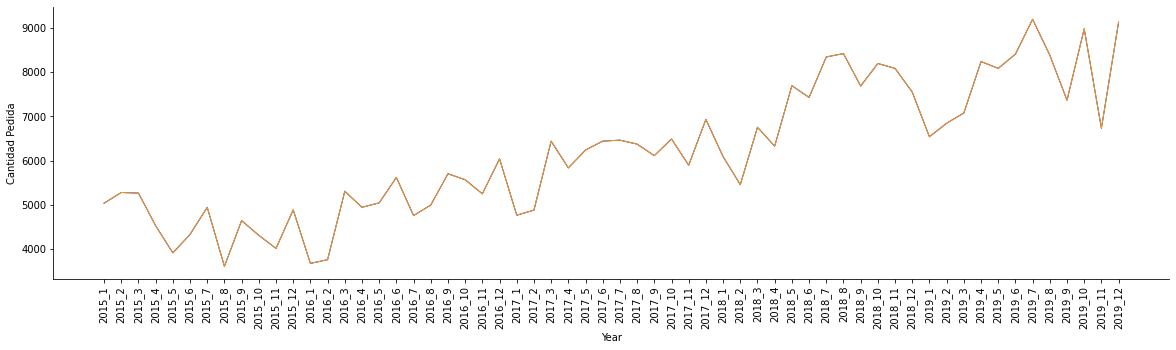

BUFALA E BURRATA
108.59859020340294


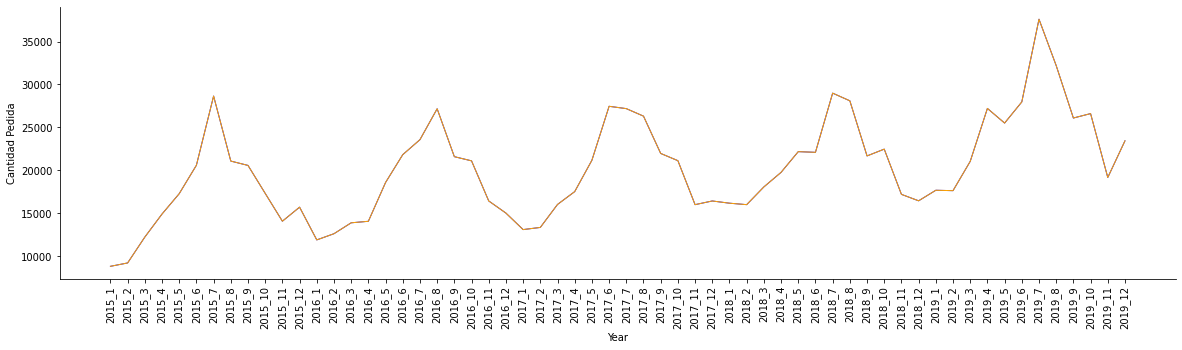

PASTA FRESCA
145.553019263314


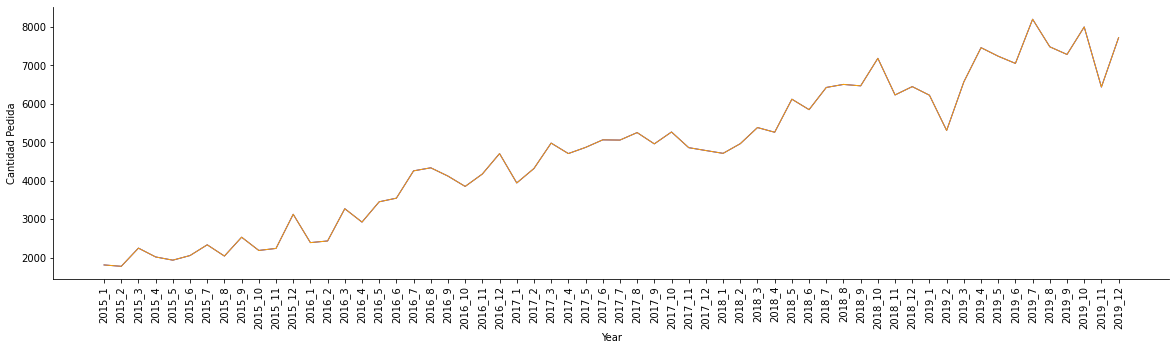

SALUMI ITALIANI
92.01461708989517


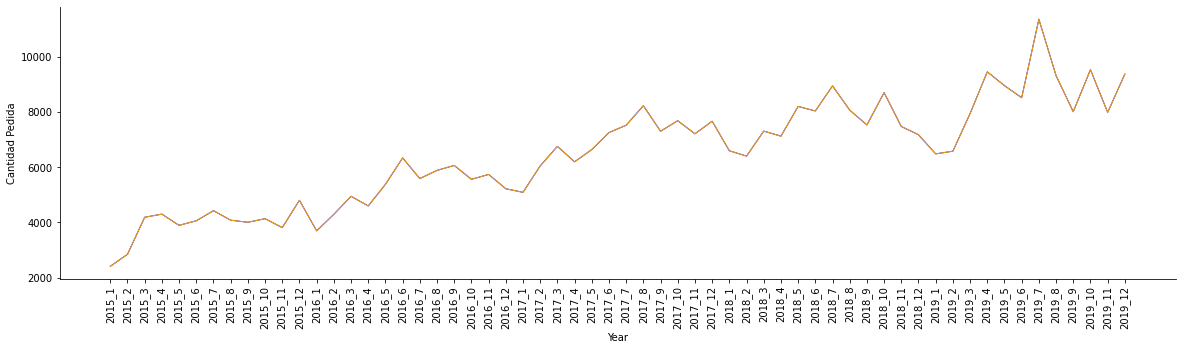

FORMAGGI MORBIDI
193.32180805740293


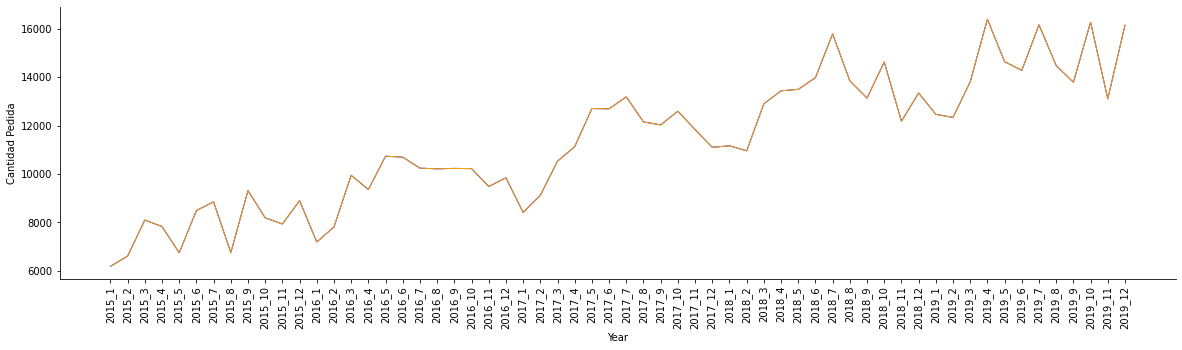

MOZZARELLA PER PIZZA
112.98823685086279


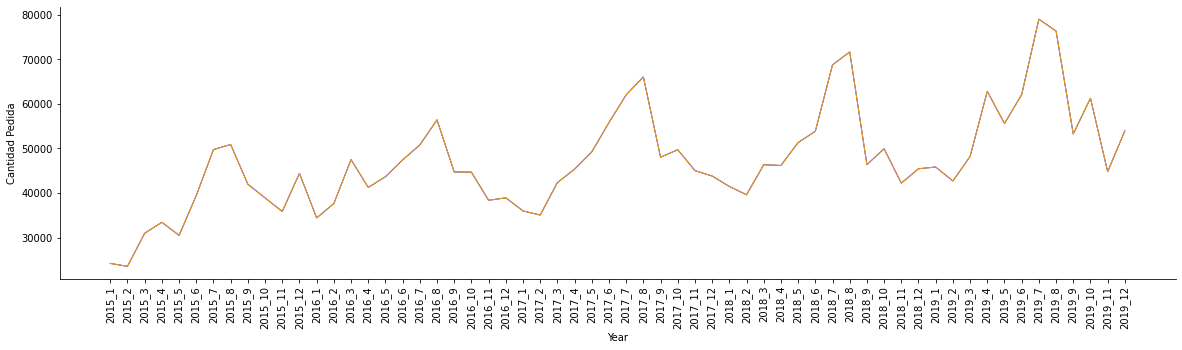

In [13]:
dfs_arima = []

for el in [formaggi_duri_filt, bufala_e_burrata_filt, pasta_fresca_filt, salumi_italiani_filt, formaggi_morbidi_filt, mozzarella_per_pizza_filt]:
    print(el['Descripcion Sub-Familia Articulos'].unique()[0])
    el_no_dis = el[el['Descuento aplicado'] < 50]

    fig, ax = plt.subplots(figsize=(20, 5), facecolor='white')

    df_tot = el.groupby(['year', 'month']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()
    
    df_tot['year_month'] = df_tot['year'].astype(str) + '_' + df_tot['month'].astype(str)
    
    df_no_dis = el_no_dis.groupby(['year', 'month']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()
    
    df_no_dis['year_month'] = df_no_dis['year'].astype(str) + '_' + df_no_dis['month'].astype(str)
    
    df_no_dis.drop(['year', 'month'], axis=1, inplace=True)
    df_tot.drop(['year', 'month'], axis=1, inplace=True)
    
    ax.plot(df_tot['year_month'].astype(str).tolist(), df_tot[0].values, lw=1, color='blue')
    ax.plot(df_no_dis['year_month'].astype(str).tolist(), df_tot[0].values, lw=1, color='orange')
    
    rms = mean_squared_error(df_no_dis[0], df_tot[0], squared=False)
    print(rms)
    
    both = df_tot.merge(df_no_dis, on='year_month', how='outer')
    both.columns = ['Actual', 'Date', 'Ground Truth']

    dfs_arima.append((both, el['Descripcion Sub-Familia Articulos'].unique()[0]))
    ax.set_ylabel("Cantidad Pedida")
    ax.set_xlabel("Year")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xticks(rotation='vertical')
    plt.show()

FORMAGGI DURI
23.784407685984743


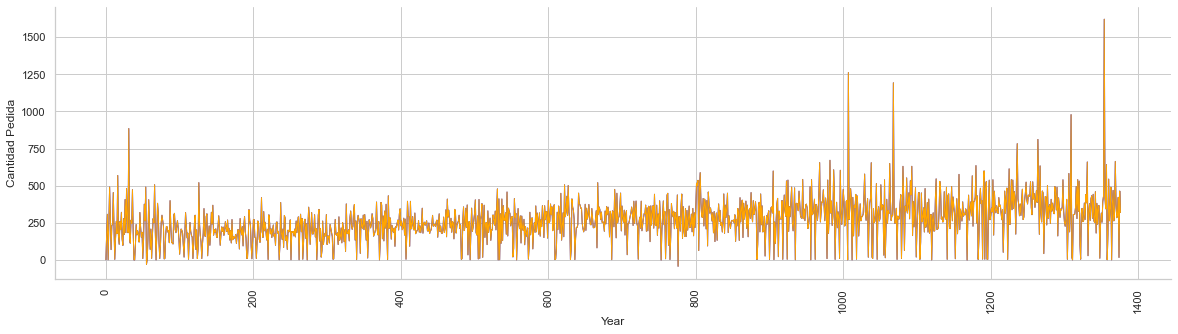

BUFALA E BURRATA
9.800235748648717


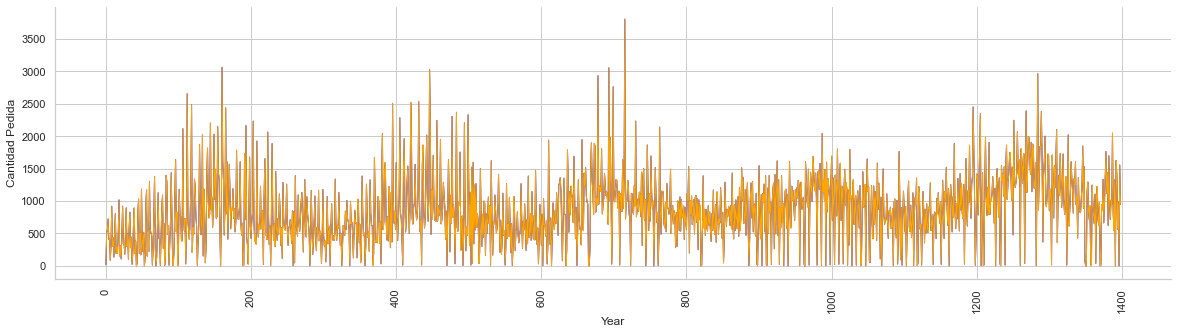

PASTA FRESCA
11.844738349167203


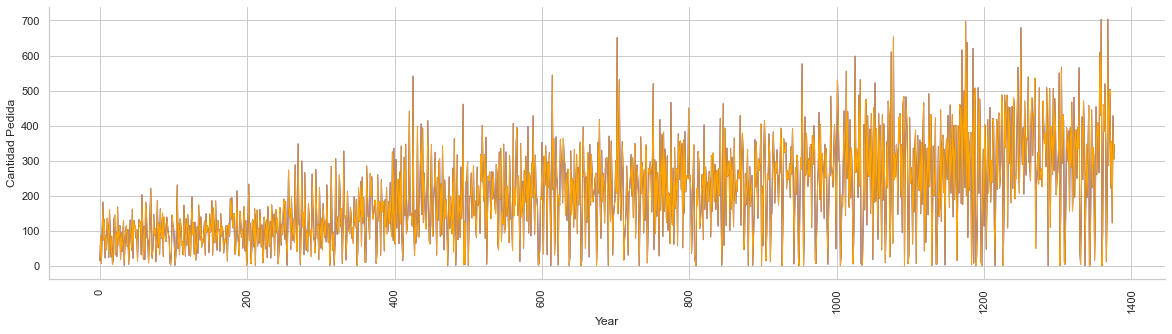

SALUMI ITALIANI
7.941045678478582


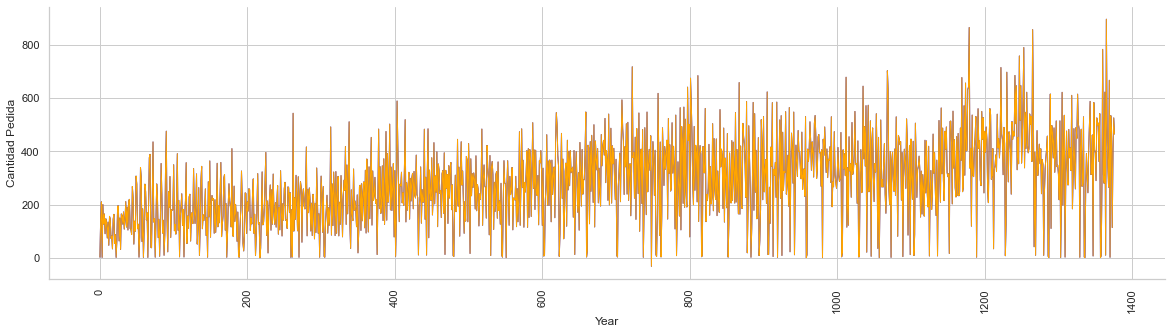

FORMAGGI MORBIDI
18.75861643767959


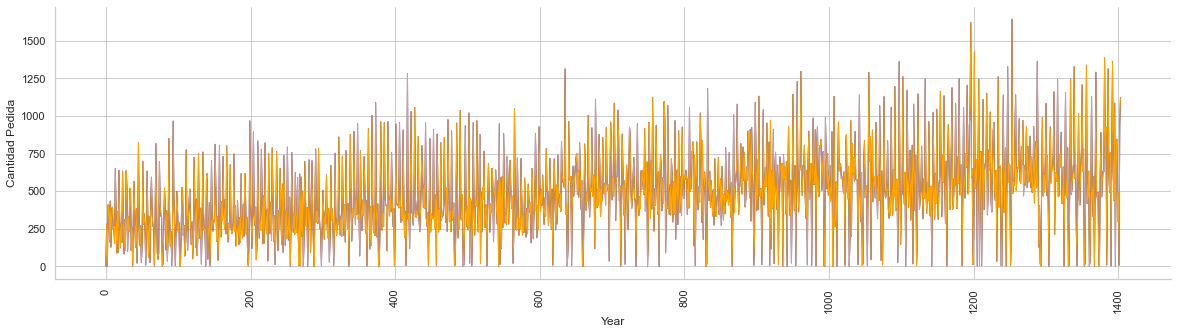

MOZZARELLA PER PIZZA
11.941126117655172


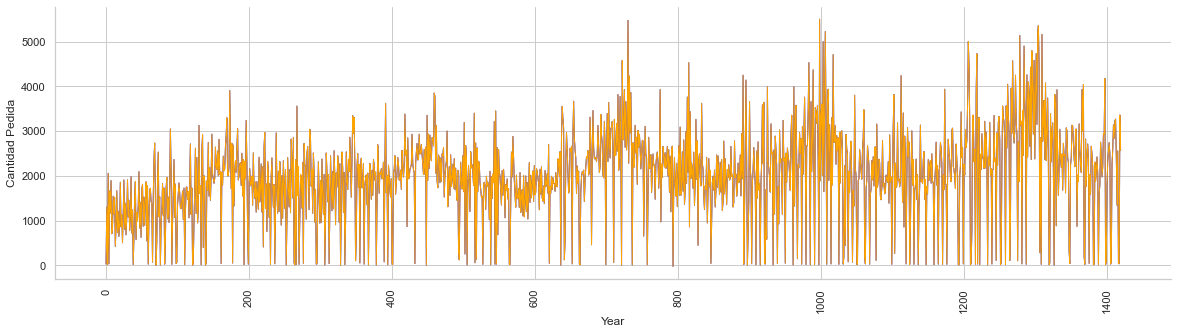

In [32]:
for el in [formaggi_duri_filt, bufala_e_burrata_filt, pasta_fresca_filt, salumi_italiani_filt, formaggi_morbidi_filt, mozzarella_per_pizza_filt]:
    print(el['Descripcion Sub-Familia Articulos'].unique()[0])
    el_no_dis = el[el['Descuento aplicado'] < 50]

    fig, ax = plt.subplots(figsize=(20, 5), facecolor='white')

    df_tot = el.groupby(['Fecha_Albaran']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()
    
    df_no_dis = el_no_dis.groupby(['Fecha_Albaran']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()
    
    ax.plot(df_tot[0].values, lw=1, color='blue')
    ax.plot(df_tot[0].values, lw=1, color='orange')
    
    both = df_tot.merge(df_no_dis, on='Fecha_Albaran', how='outer')
    both['0_y'] = both['0_y'].fillna(0)
    
    rms = mean_squared_error(both['0_y'], both['0_x'], squared=False)
    print(rms)
    
    ax.set_ylabel("Cantidad Pedida")
    ax.set_xlabel("Year")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xticks(rotation='vertical')
    plt.show()

In [33]:
dfs_arima

[(      Actual     Date  Ground Truth
  0   5033.824   2015_1      5002.604
  1   5276.214   2015_2      5271.061
  2   5262.836   2015_3      5235.040
  3   4524.915   2015_4      4490.695
  4   3909.574   2015_5      3839.604
  5   4326.748   2015_6      4311.269
  6   4941.080   2015_7      4940.080
  7   3605.687   2015_8      3561.485
  8   4640.375   2015_9      4563.614
  9   4306.656  2015_10      4229.100
  10  4010.388  2015_11      3984.529
  11  4883.776  2015_12      4858.322
  12  3671.914   2016_1      3554.895
  13  3755.890   2016_2      3639.003
  14  5304.825   2016_3      5210.805
  15  4941.311   2016_4      4865.166
  16  5042.541   2016_5      4964.478
  17  5616.669   2016_6      5503.655
  18  4753.372   2016_7      4616.829
  19  4992.736   2016_8      4788.983
  20  5700.024   2016_9      5458.035
  21  5565.396  2016_10      5190.488
  22  5245.558  2016_11      4804.962
  23  6038.178  2016_12      5601.846
  24  4762.444   2017_1      4537.854
  25  4876.8

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


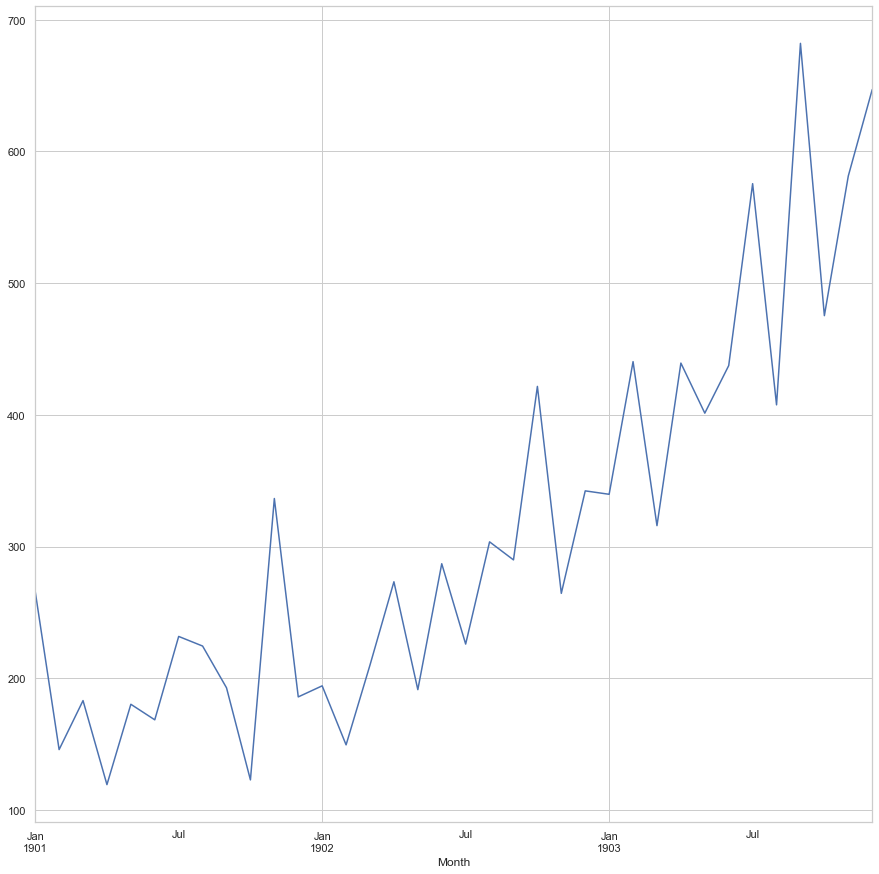

In [35]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('/home/jbonet/Desktop/EMIBA/BDP/data/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

FORMAGGI DURI


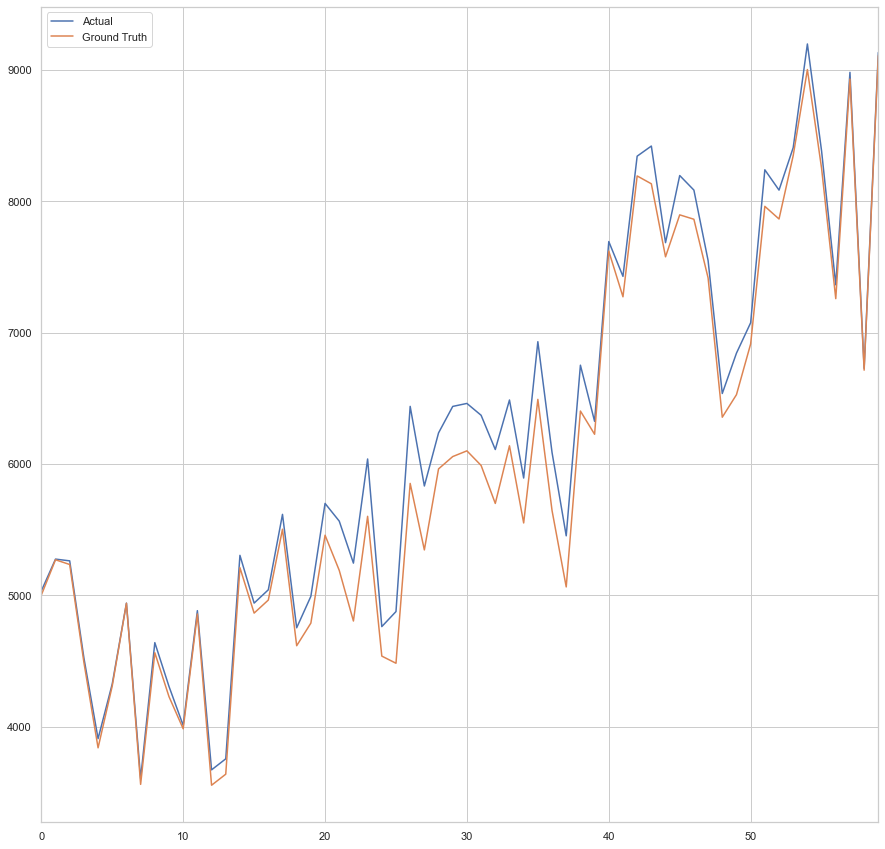

BUFALA E BURRATA


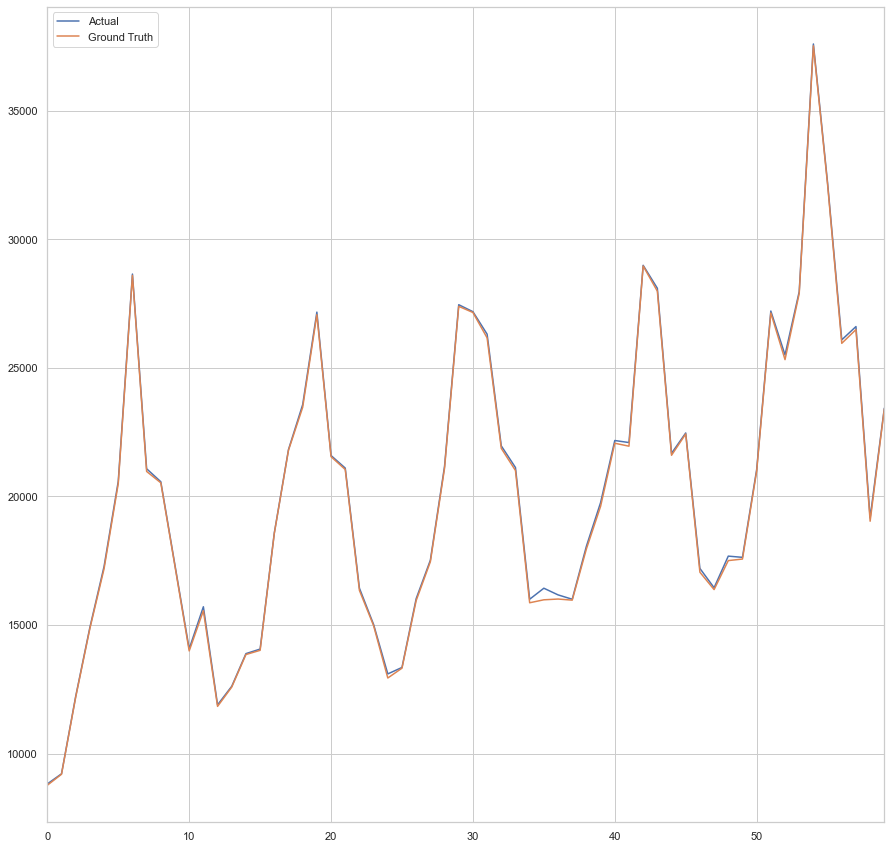

PASTA FRESCA


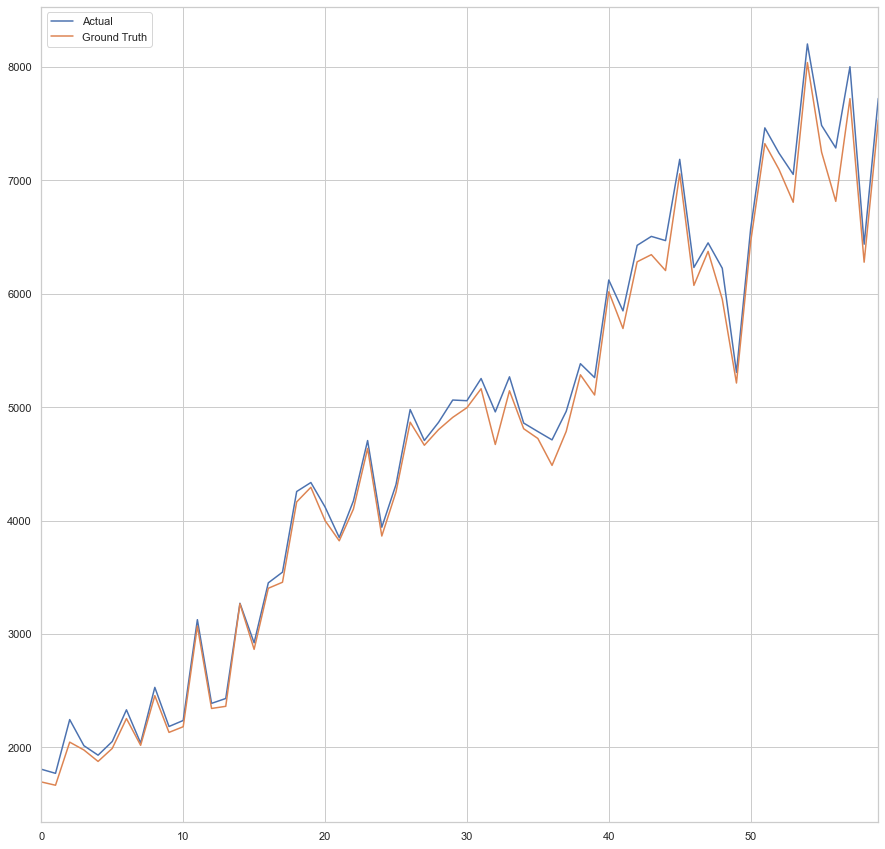

SALUMI ITALIANI


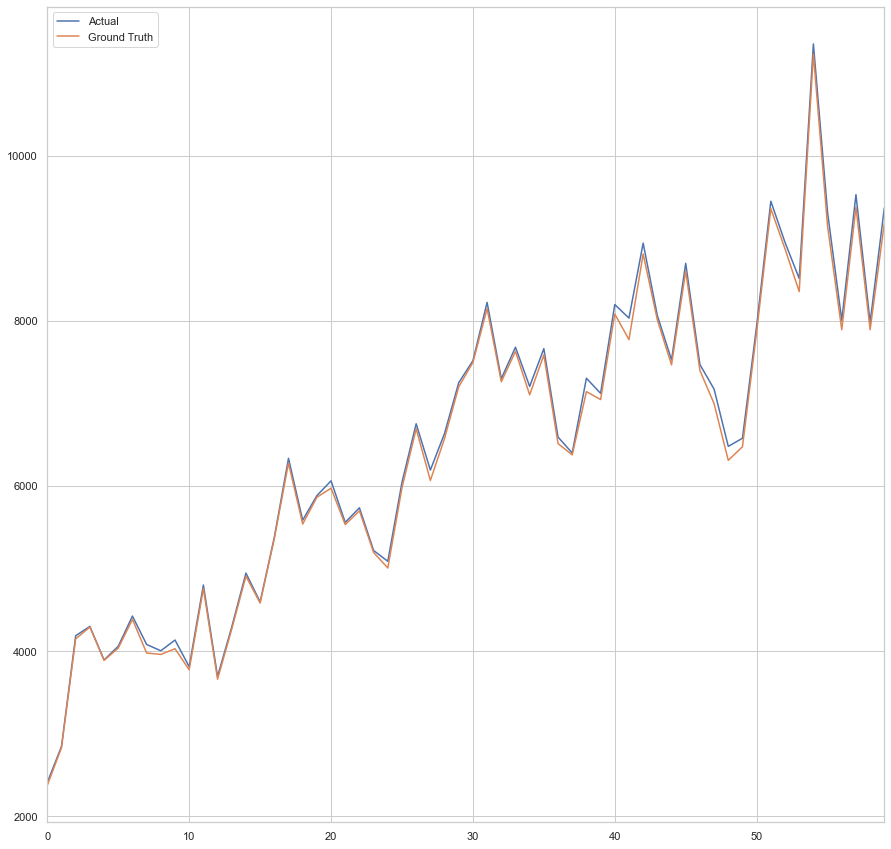

FORMAGGI MORBIDI


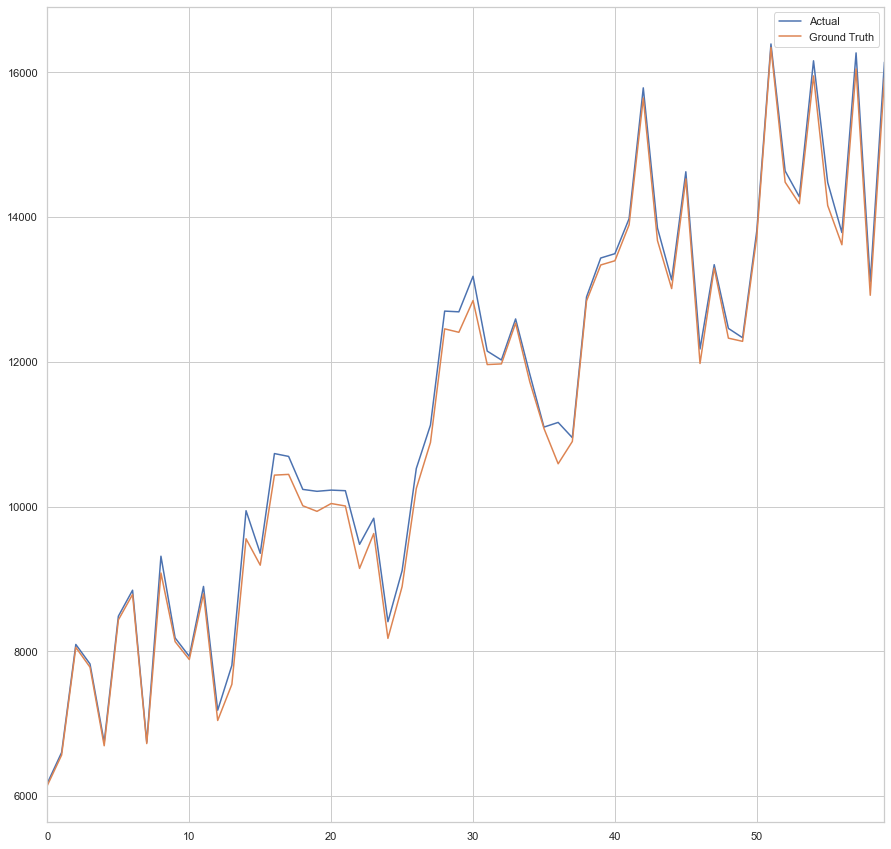

MOZZARELLA PER PIZZA


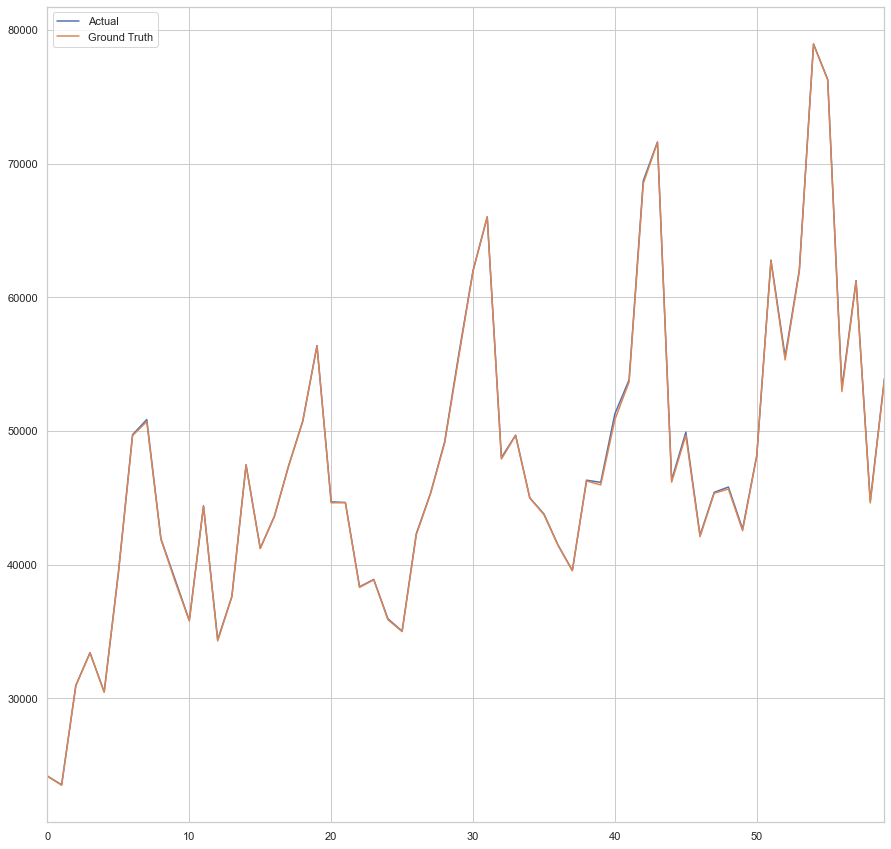

In [44]:
for el in dfs_arima: 
    print(el[1])
    el[0].plot()
    pyplot.show()

In [47]:
from pandas.plotting import autocorrelation_plot

FORMAGGI DURI


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


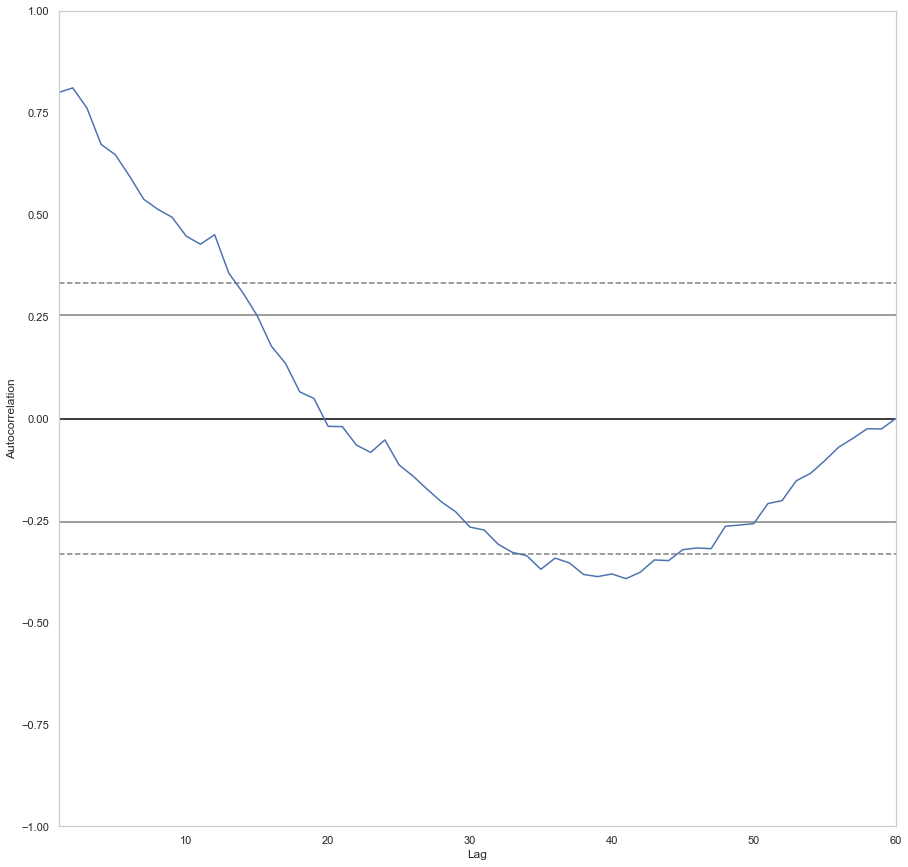

BUFALA E BURRATA


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


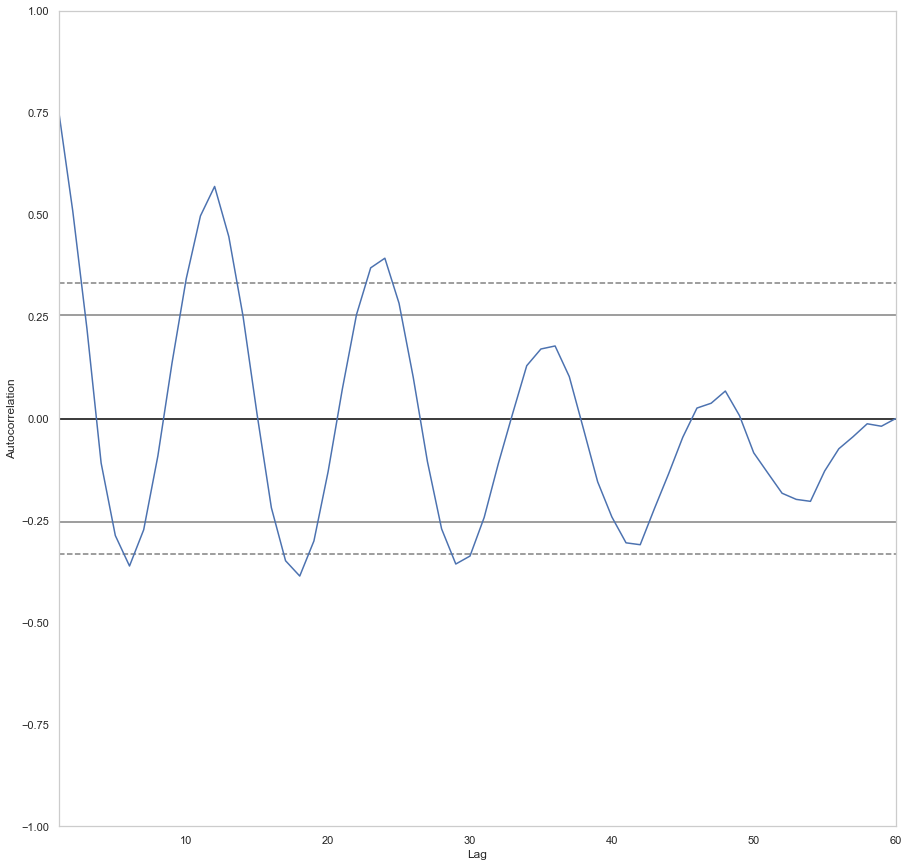

PASTA FRESCA


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


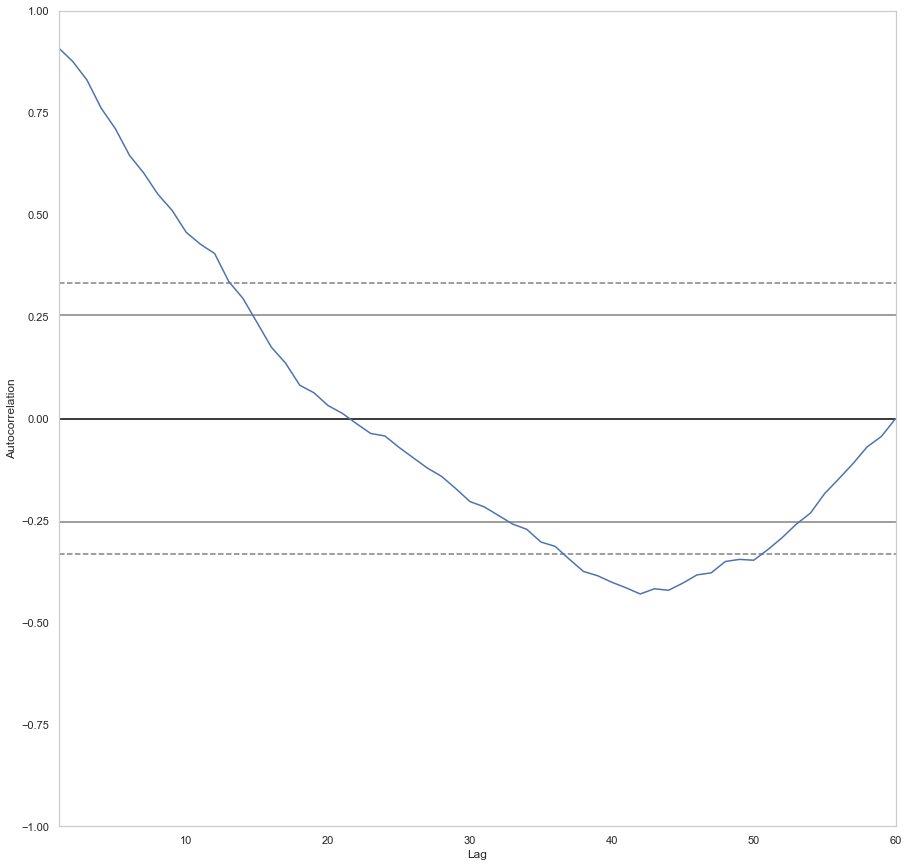

SALUMI ITALIANI


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


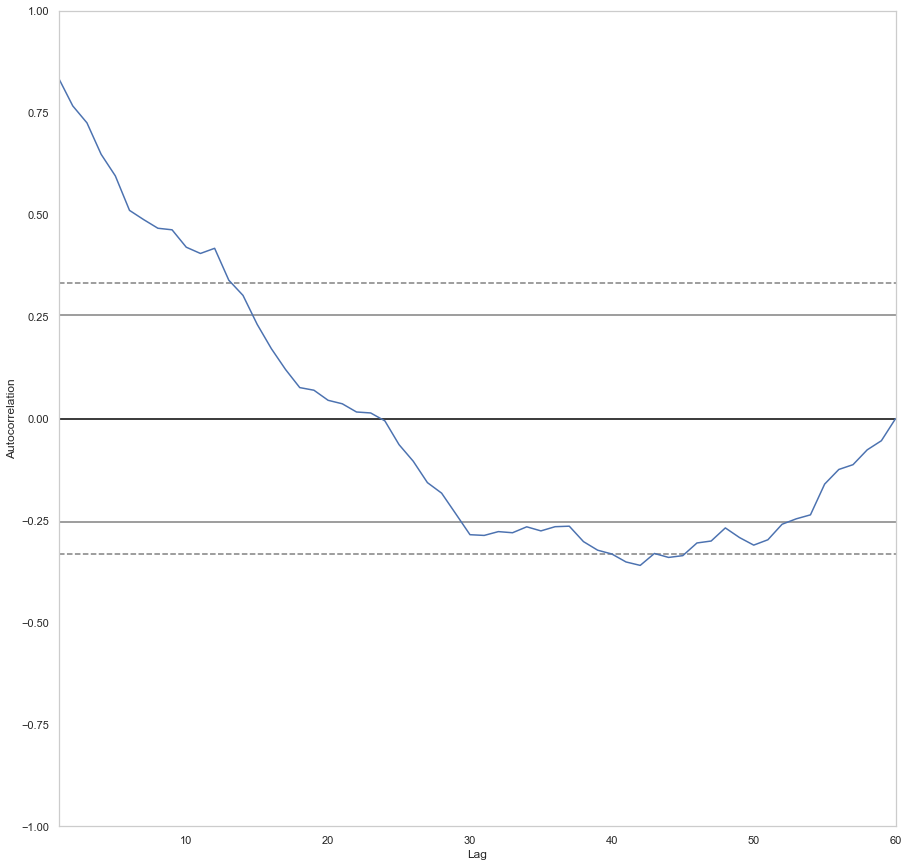

FORMAGGI MORBIDI


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


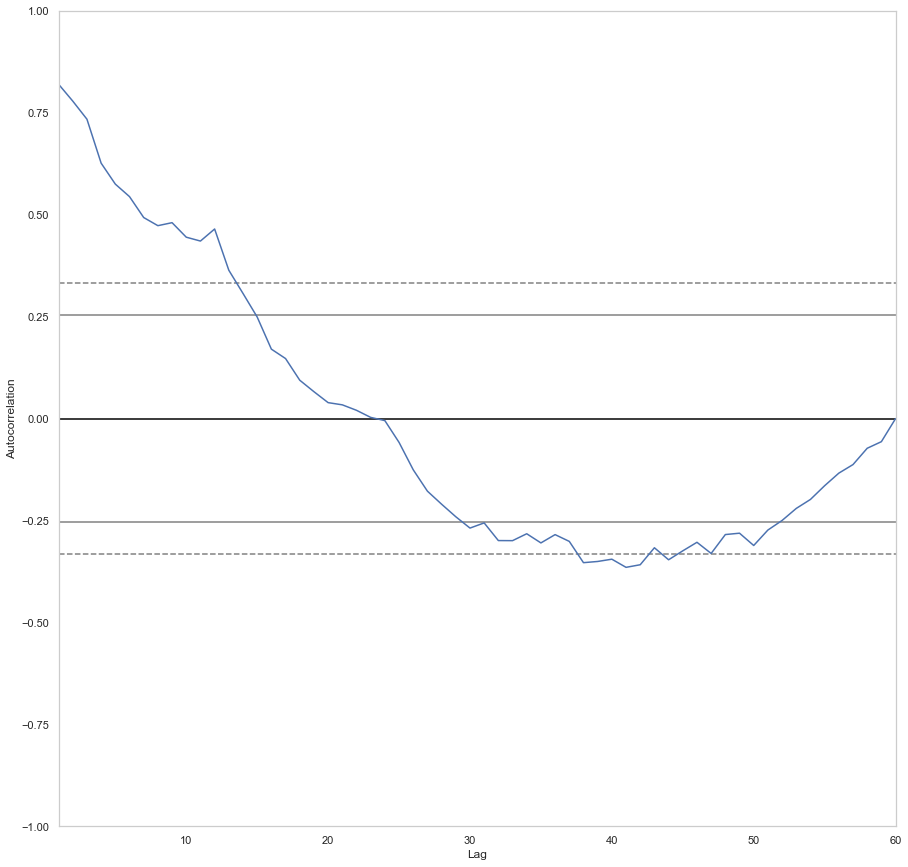

MOZZARELLA PER PIZZA


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


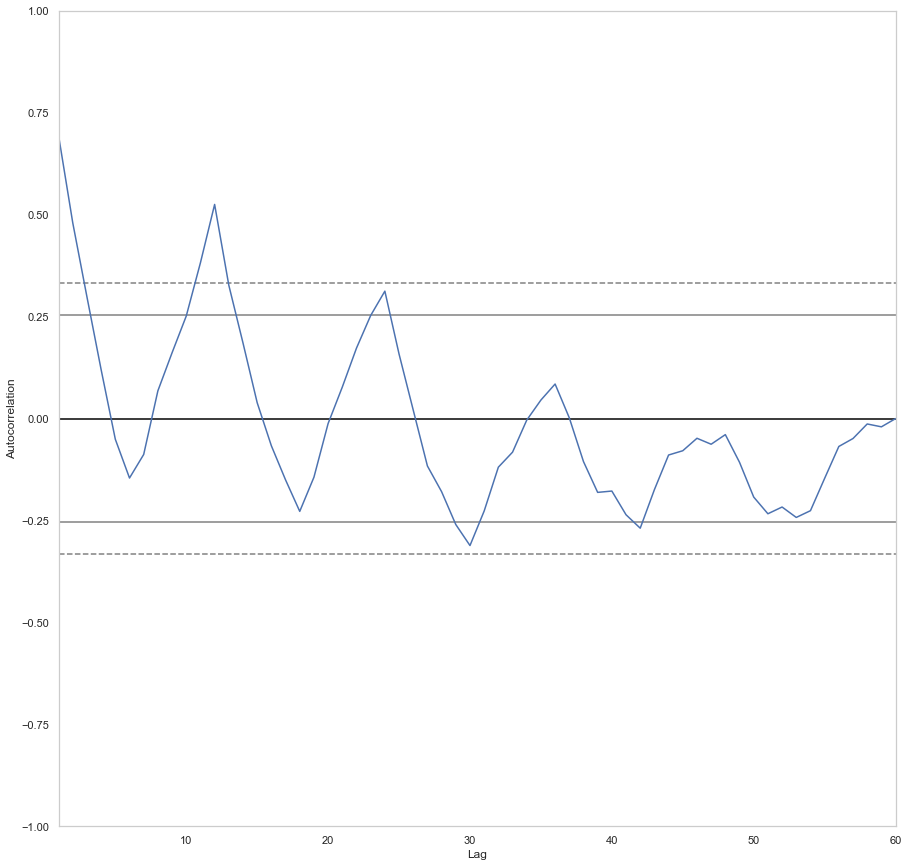

In [50]:
for el in dfs_arima: 
    print(el[1])
    autocorrelation_plot(el[0]['Actual'])
    pyplot.show()

predicted=7742.672813, expected=6356.230000
predicted=6787.782953, expected=6527.748000
predicted=6652.261124, expected=6913.827000
predicted=6768.335104, expected=7961.319000
predicted=7809.801209, expected=7865.023000
predicted=7633.595559, expected=8347.936000
predicted=8087.611776, expected=9002.441000
predicted=8474.398341, expected=8250.795000
predicted=8373.161077, expected=7258.660000
predicted=7581.110197, expected=8930.315000
predicted=8359.392812, expected=6714.371000
predicted=7398.737934, expected=9108.568000
Test RMSE: 1063.555
Actual RMSE: 172.617


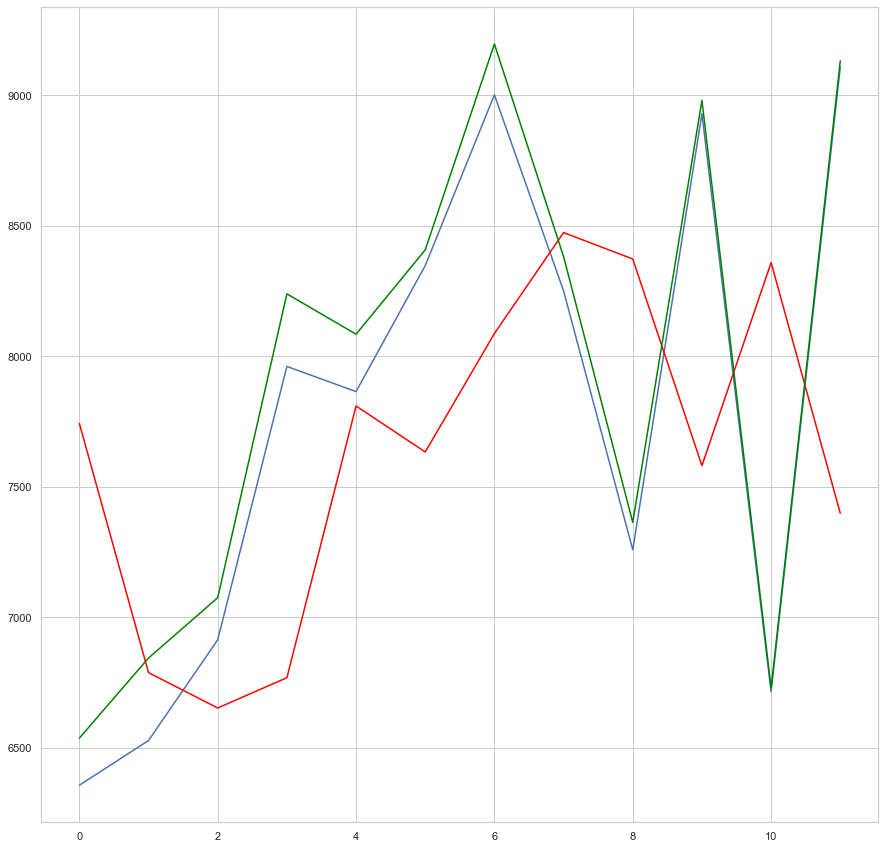

In [73]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

#series.index = series.index.to_period('M')
# split into train and test sets
X = dfs_arima[0][0]['Ground Truth'].values

size = 48
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
rmse = sqrt(mean_squared_error(test, dfs_arima[0][0]['Actual'].tolist()[48:]))
print('Actual RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.plot(dfs_arima[0][0]['Actual'].tolist()[48:], color='green')
pyplot.show()

Work September 28th 

In [14]:
df.head()

Cod_Grupo Numero_albaran Fecha_Albaran        Nombre_Comercial  \
0       38.0           7859    2019-08-27  COMERCIAL TILMAD, S.L.   
1       38.0           1962    2019-03-06  COMERCIAL TILMAD, S.L.   
2       38.0          11613    2018-12-18  COMERCIAL TILMAD, S.L.   
3       38.0           1949    2017-03-21  COMERCIAL TILMAD, S.L.   
4       38.0           2145    2017-03-28  COMERCIAL TILMAD, S.L.   

   Numero de Factura                                  Direccion Cliente  \
0            11171.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
1             3590.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
2            16755.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
3             3256.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   
4             3256.0  000  - COMERCIAL TILMAD, S.L. - C/NAPOLS, 323 ...   

                 Documento Codigo de Articulo  \
0  2019/01/0007859/0000001                232   
1  2019/01/0001962/0000001                232   
2  2018/01/0011613/0000002                231   
3  2017/01/0001949/0000003               9002   
4  2017/01/0002145/0000004               9002   

                           Nombre Articulo  Cantidad Pedida  ...  \
0                        BURRATA DA 250 GR             10.0  ...   
1                        BURRATA DA 250 GR              6.0  ...   
2                      BURRATINA DA 125 GR             40.0  ...   
3  MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG             40.0  ...   
4  MOZZARELLA MAMMA MIA JULIENNE DA 2.5 KG             50.0  ...   

   Descuento aplicado  Total Producto (Cantidad x Precio x Dto)  \
0                0.00                                     98.50   
1                0.00                                     59.10   
2                0.00                                    394.00   
3               13.98                                    166.88   
4               13.98                                    208.60   

   Descripcion Familia de Articulo Descripcion Sub-Familia Articulos  \
0                           QUESOS                  BUFALA E BURRATA   
1                           QUESOS                  BUFALA E BURRATA   
2                           QUESOS                  BUFALA E BURRATA   
3                           QUESOS              MOZZARELLA PER PIZZA   
4                           QUESOS              MOZZARELLA PER PIZZA   

  Diferencia Caducidad  Tipo de Producto  year  month  Ground Truth  \
0                 13.0      Ultra Fresco  2019      8          98.5   
1                 13.0      Ultra Fresco  2019      3          59.1   
2                 13.0      Ultra Fresco  2018     12         394.0   
3                  0.0      Ultra Fresco  2017      3         194.0   
4                  0.0      Ultra Fresco  2017      3         242.5   

   Perdida Descuento  
0             0.0000  
1             0.0000  
2             0.0000  
3            27.1212  
4            33.9015  

[5 rows x 21 columns]

In [15]:
df_filt = df[df['year'] >= 2020]

In [38]:
formaggi_duri_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'FORMAGGI DURI']
bufala_e_burrata_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'BUFALA E BURRATA']
pasta_fresca_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'PASTA FRESCA']
salumi_italiani_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'SALUMI ITALIANI']
formaggi_morbidi_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'FORMAGGI MORBIDI']
mozzarella_per_pizza_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'MOZZARELLA PER PIZZA']
birra_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'BIRRE']

FORMAGGI DURI
376.3900601084091


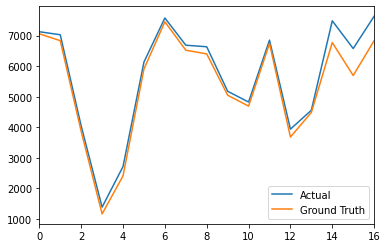

BUFALA E BURRATA
851.4821334046609


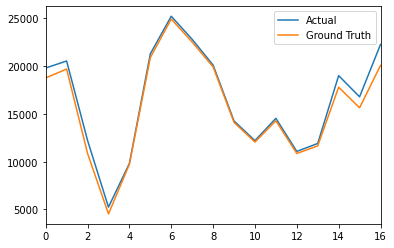

PASTA FRESCA
438.74497308385537


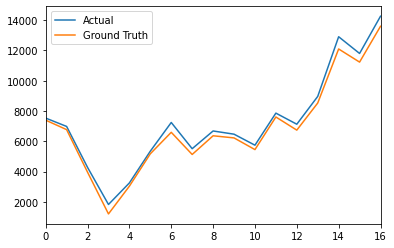

SALUMI ITALIANI
515.2229064641373


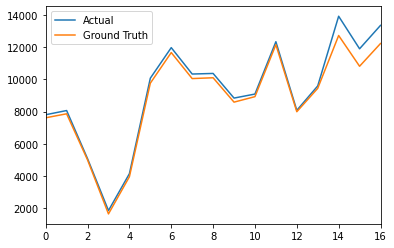

FORMAGGI MORBIDI
1290.4328520038625


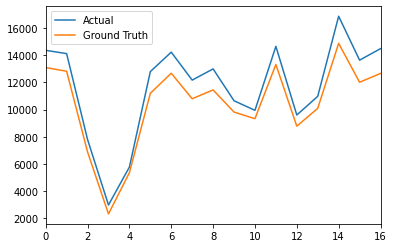

MOZZARELLA PER PIZZA
4212.894196951293


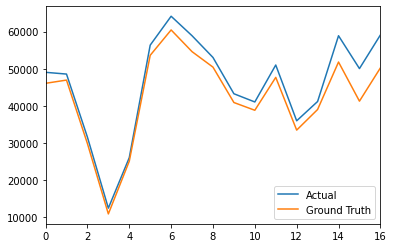

BIRRE
1128.2933444589717


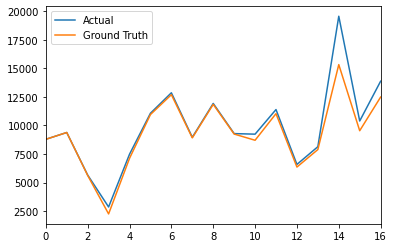

In [46]:
dfs_arima = []

for el in [formaggi_duri_filt, bufala_e_burrata_filt, pasta_fresca_filt, salumi_italiani_filt, formaggi_morbidi_filt, mozzarella_per_pizza_filt, birra_filt]:
    print(el['Descripcion Sub-Familia Articulos'].unique()[0])
    el_no_dis = el[el['Descuento aplicado'] < 40]

    #fig, ax = plt.subplots(figsize=(5, 5), facecolor='white')

    df_tot = el.groupby(['year', 'month']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()
    
    df_tot['year_month'] = df_tot['year'].astype(str) + '_' + df_tot['month'].astype(str)
    
    df_no_dis = el_no_dis.groupby(['year', 'month']).apply(
            lambda x: x['Cantidad Pedida'].sum()).reset_index()
    
    df_no_dis['year_month'] = df_no_dis['year'].astype(str) + '_' + df_no_dis['month'].astype(str)
    
    df_no_dis.drop(['year', 'month'], axis=1, inplace=True)
    df_tot.drop(['year', 'month'], axis=1, inplace=True)
    
    ax.plot(df_tot['year_month'].astype(str).tolist(), df_tot[0].values, lw=1, color='blue')
    ax.plot(df_no_dis['year_month'].astype(str).tolist(), df_no_dis[0].values, lw=1, color='orange')
    
    rms = mean_squared_error(df_no_dis[0], df_tot[0], squared=False)
    print(rms)

    both = df_tot.merge(df_no_dis, on='year_month', how='outer')
    both.columns = ['Actual', 'Date', 'Ground Truth']

    dfs_arima.append((both, el['Descripcion Sub-Familia Articulos'].unique()[0]))
    
    both.plot()
    pyplot.show()

FORMAGGI DURI


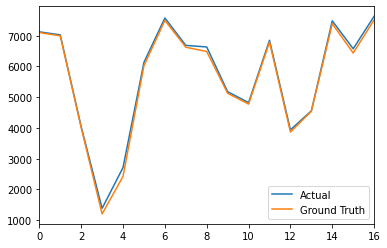

BUFALA E BURRATA


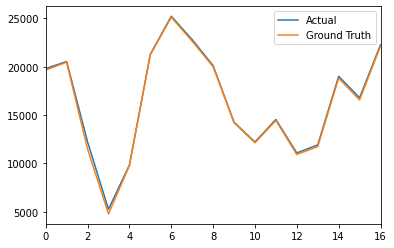

PASTA FRESCA


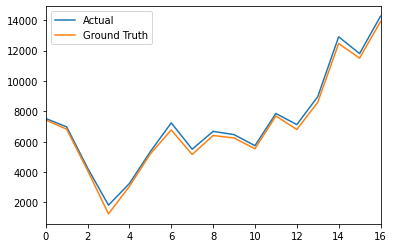

SALUMI ITALIANI


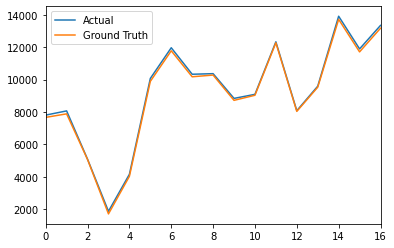

FORMAGGI MORBIDI


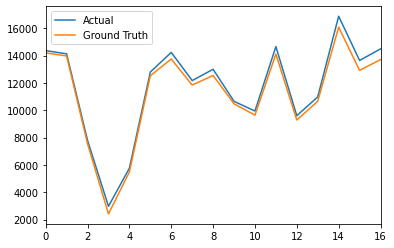

MOZZARELLA PER PIZZA


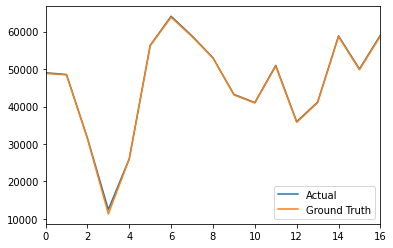

BIRRE


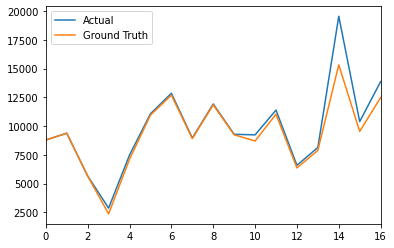

In [41]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

for el in dfs_arima: 
    print(el[1])
    el[0].plot()
    pyplot.show()

In [24]:
df_test = df[(df['year'] == 2020) & (df['Descripcion Sub-Familia Articulos'] == 'PASTA FRESCA')]

In [27]:
df_test.shape

(18067, 21)

In [28]:
df_test.columns

Index(['Cod_Grupo', 'Numero_albaran', 'Fecha_Albaran', 'Nombre_Comercial',
       'Numero de Factura', 'Direccion Cliente', 'Documento',
       'Codigo de Articulo', 'Nombre Articulo', 'Cantidad Pedida',
       'Precio Unitario', 'Descuento aplicado',
       'Total Producto (Cantidad x Precio x Dto)',
       'Descripcion Familia de Articulo', 'Descripcion Sub-Familia Articulos',
       'Diferencia Caducidad', 'Tipo de Producto', 'year', 'month',
       'Ground Truth', 'Perdida Descuento'],
      dtype='object')

In [31]:
df_test[df_test['Descuento aplicado'] >= 50]['Cantidad Pedida'].sum()

2998.0

In [32]:
df_test[df_test['Descuento aplicado'] < 50]['Cantidad Pedida'].sum()

65680.4

In [34]:
df_test[df_test['Descuento aplicado'] < 50]['Descuento aplicado'].mean()

22.409276441162444

In [42]:
for i, j in df.groupby('Descripcion Sub-Familia Articulos'):
    print(i)
    for k, l in j.groupby('year'):
        print(k, l[l['Descuento aplicado'] >= 40]['Cantidad Pedida'].sum())

ALTRI FORMAGGI GRATTUGIATI
2015 398.0
2016 44.0
2017 3.0
2018 9.0
2019 12.0
2020 9.0
BIBITE ANALCOLICHE
2015 4.5
2016 2.0
2017 45.0
2018 60.0
2019 28.0
2020 55.125
2021 65.0
BIRRA ARTIGIANALE
2015 0.0
2016 0.0
2017 26.0
2018 299.0
2019 295.0
2020 377.0
2021 94.0
BIRRE
2015 24.0
2016 12.0
2017 165.0
2018 263.0
2019 519.0799999999999
2020 2351.749
2021 6952.834
BOCCONCINI
2015 409.0
2016 20764.0
2017 42323.0
2018 11812.0
2019 19786.0
2020 10476.0
2021 22413.0
BUFALA E BURRATA
2015 19461.025
2016 51101.619999999995
2017 42543.425
2018 33652.25
2019 17693.9
2020 5735.624999999999
2021 5022.07
CONDIMENTOS
2015 7.0
2016 25.0
2017 403.0
2018 371.0
2019 81.0
2020 71.0
2021 81.0
CONSERVE
2015 561.0
2016 395.621
2017 15374.684000000001
2018 3812.653
2019 16793.675
2020 797.672
2021 636.289
FARINE
2015 494.5
2016 289.75
2017 567.375
2018 543.75
2019 887.55
2020 764.925
2021 279.79999999999995
FORMAGGI DURI
2015 1734.3909999999996
2016 5280.528
2017 8434.984
2018 7033.353
2019 3893.6620000000003
2

In [52]:
df[df['Descuento aplicado'] >= 50].shape

(25974, 21)

In [50]:
df.shape

(1296226, 21)

In [71]:
df_buf = df[df['Descripcion Sub-Familia Articulos'] == 'FORMAGGI MORBIDI']

In [72]:
for i, j in df_buf.groupby('Tipo de Producto'):
    print(i)
    for k, l in j.groupby('year'):
        print(k, l[l['Descuento aplicado'] >= 50]['Cantidad Pedida'].sum() / l['Cantidad Pedida'].sum())

Fresco
2015 0.0029401561624513646
2016 0.0017775322542335447
2017 0.003291859255181549
2018 0.0073340691271438965
2019 0.004387361247541138
2020 0.0342066040853002
2021 0.04142193871078459
Seco
2015 0.01671845939037653
2016 0.08109994210972547
2017 0.04279730966421657
2018 0.002952389681137415
2019 0.009802923083938549
2020 0.014426570500019194
2021 0.04296647243738481
Ultra Fresco
2015 0.023437507839806044
2016 0.029592215379928156
2017 0.027934361338807896
2018 0.047118292644744306
2019 0.043283513457048055
2020 0.0656893338719996
2021 0.08475528554245734


In [77]:
df_filt = df[df['year'] < 2020]

In [78]:
formaggi_duri_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'FORMAGGI DURI']
bufala_e_burrata_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'BUFALA E BURRATA']
pasta_fresca_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'PASTA FRESCA']
salumi_italiani_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'SALUMI ITALIANI']
formaggi_morbidi_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'FORMAGGI MORBIDI']
mozzarella_per_pizza_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'MOZZARELLA PER PIZZA']
birra_filt = df_filt[df_filt['Descripcion Sub-Familia Articulos'] == 'BIRRE']

FORMAGGI DURI
Fresco
8.95385753367415


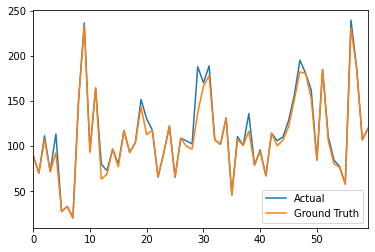

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


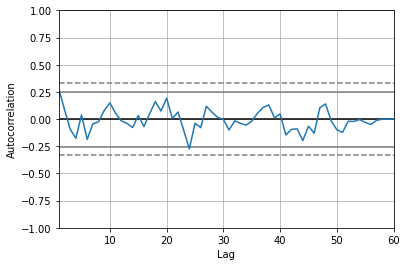

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


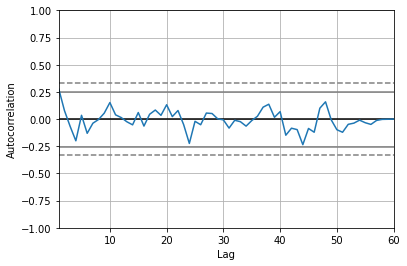

FORMAGGI DURI
Seco
491.6665412461987


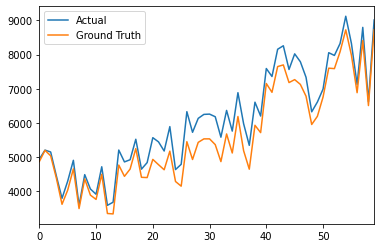

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


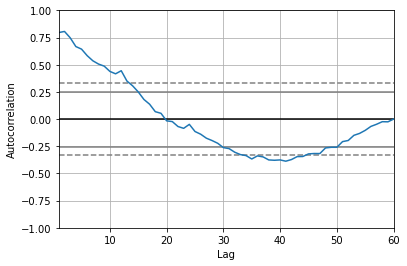

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


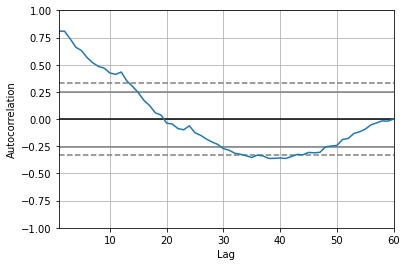

FORMAGGI DURI
Ultra Fresco
2.509093860340822


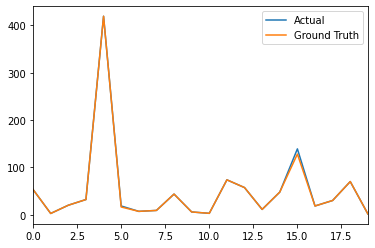

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


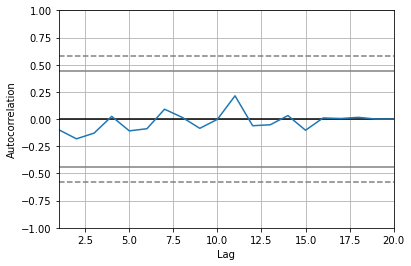

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


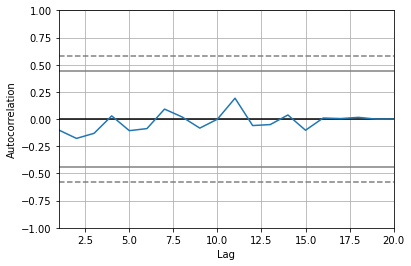

BUFALA E BURRATA
Fresco
3134.775111772042


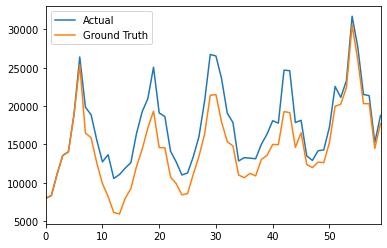

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


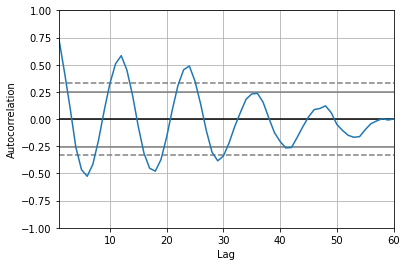

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


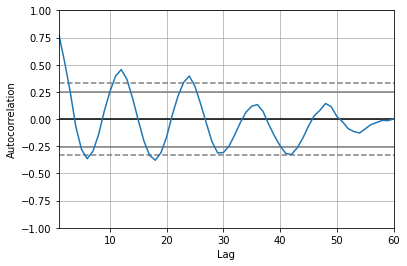

BUFALA E BURRATA
Seco
21.77243964067823


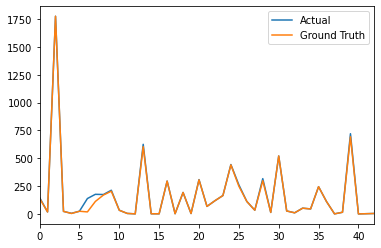

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


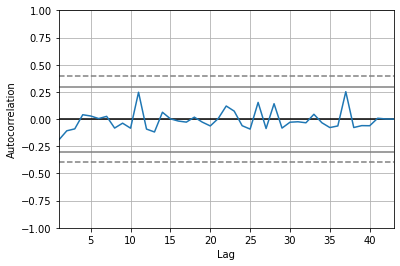

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


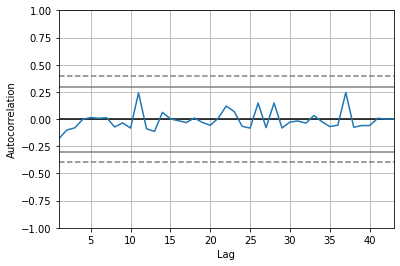

BUFALA E BURRATA
Ultra Fresco
80.15789824101338


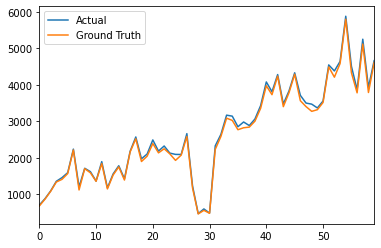

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


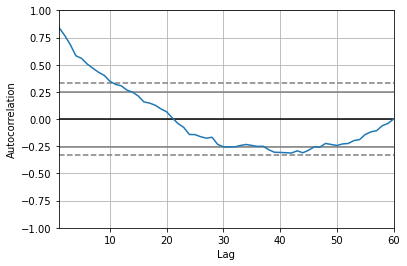

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


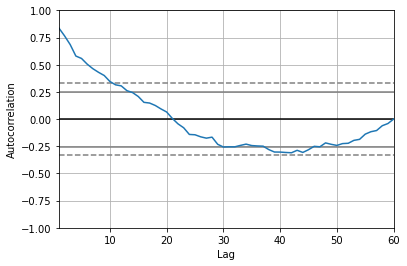

PASTA FRESCA
Fresco
214.8378491250242


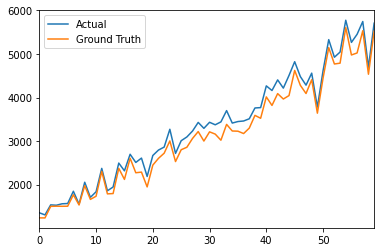

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


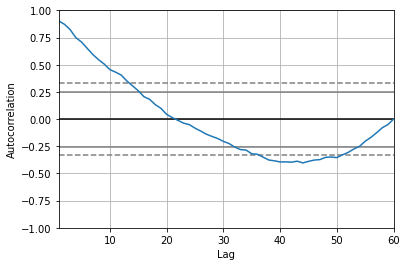

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


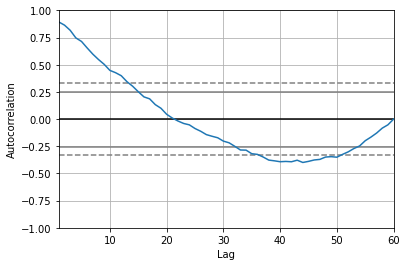

PASTA FRESCA
Seco
58.918446460623294


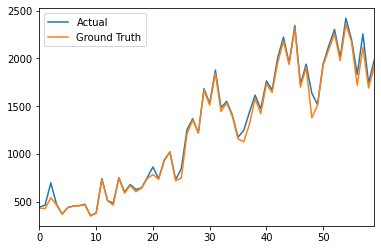

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


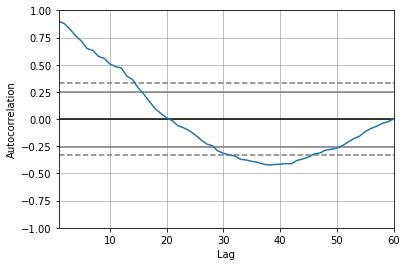

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


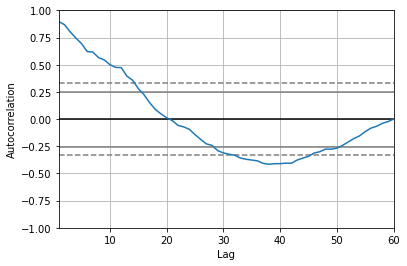

PASTA FRESCA
Ultra Fresco


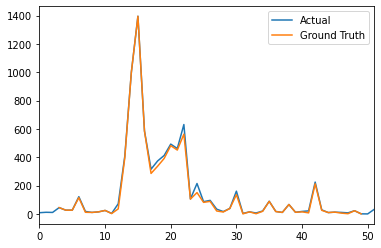

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


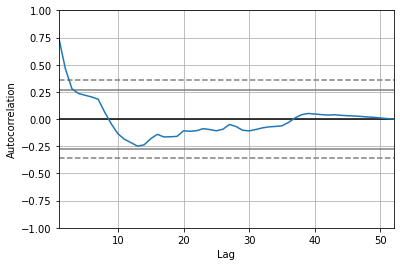

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


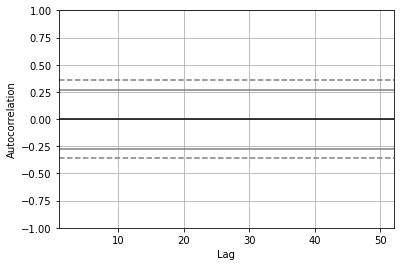

SALUMI ITALIANI
Fresco
48.684039492425015


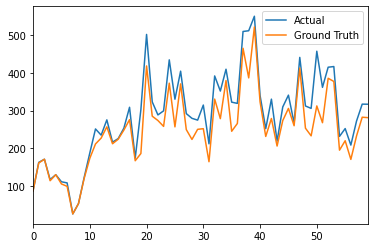

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


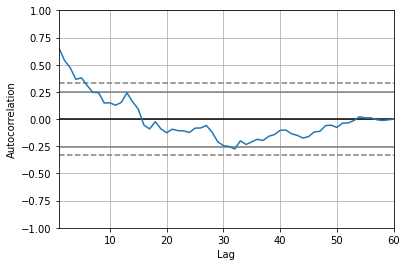

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


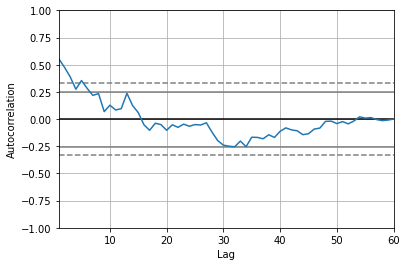

SALUMI ITALIANI
Seco
343.73194814753543


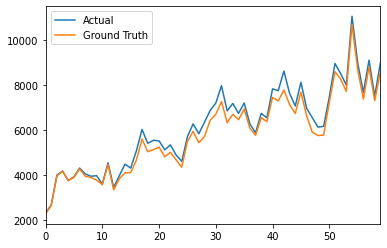

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


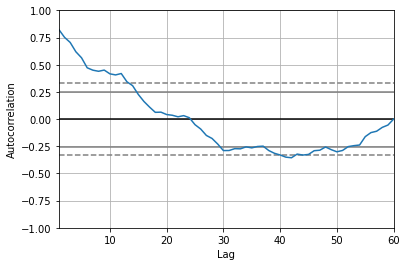

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


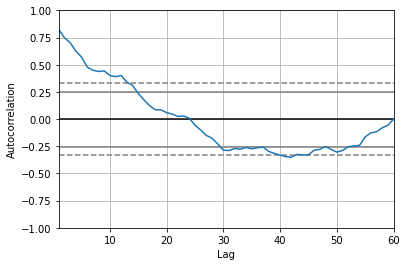

SALUMI ITALIANI
Ultra Fresco
13.740243720158741


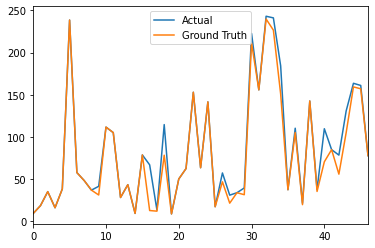

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


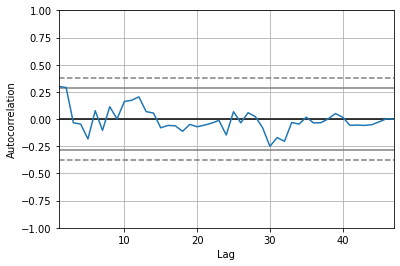

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


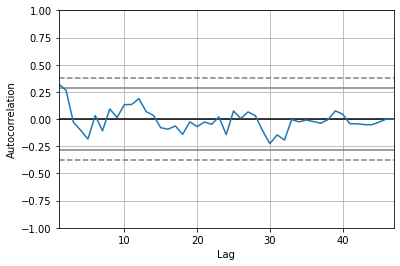

FORMAGGI MORBIDI
Fresco
305.8838810551589


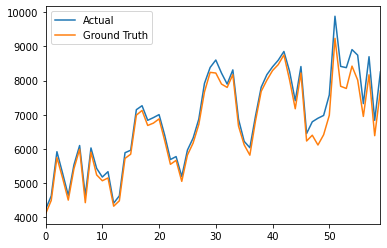

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


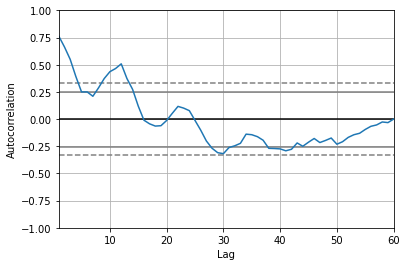

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


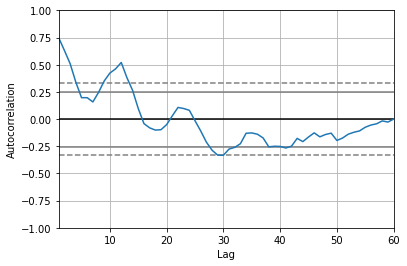

FORMAGGI MORBIDI
Seco
391.89358860952296


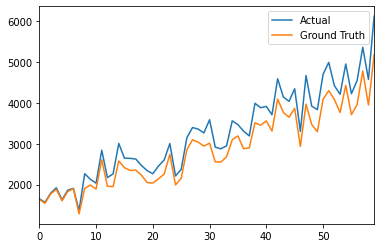

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


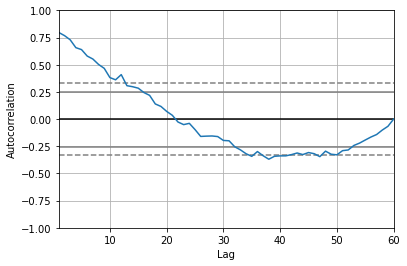

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


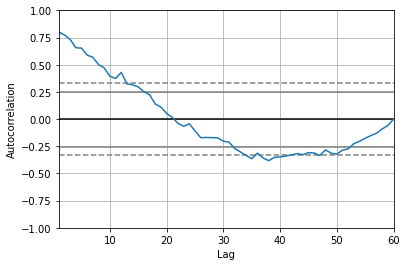

FORMAGGI MORBIDI
Ultra Fresco
92.08667381141528


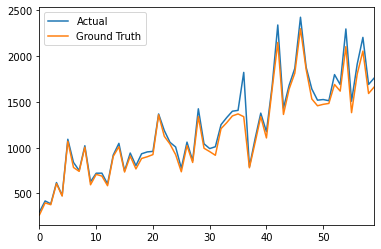

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


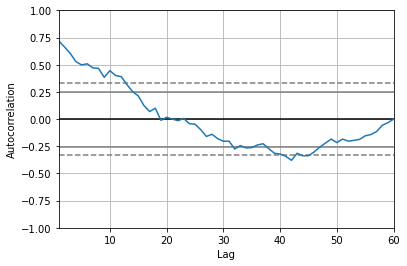

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


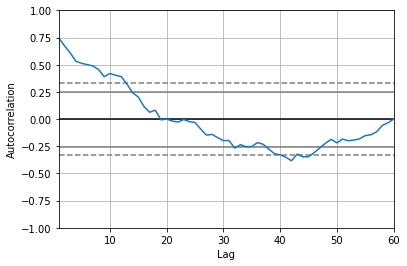

MOZZARELLA PER PIZZA
Fresco
1323.450614555249


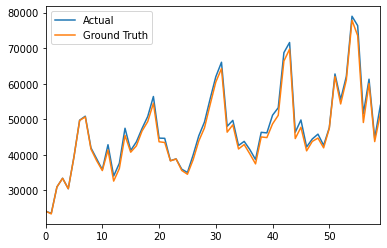

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


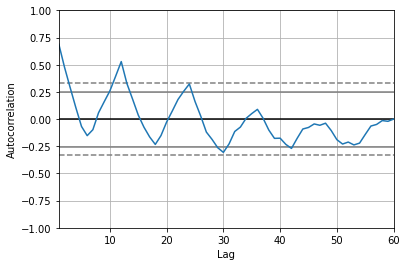

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


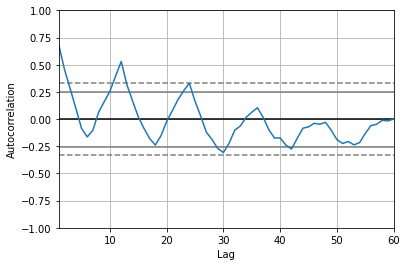

MOZZARELLA PER PIZZA
Seco
3.4069257193462343


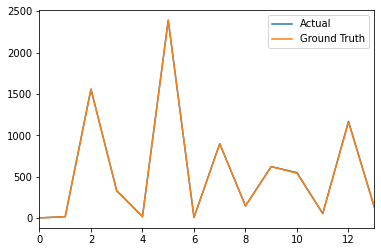

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


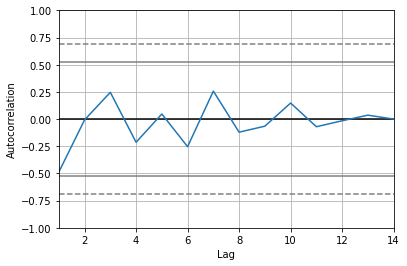

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


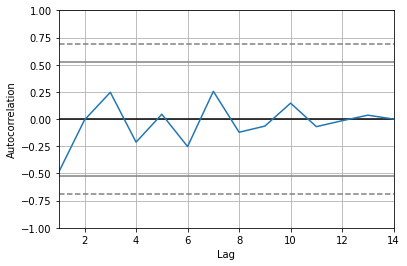

MOZZARELLA PER PIZZA
Ultra Fresco
0.5773502691896257


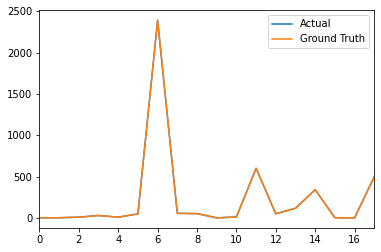

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


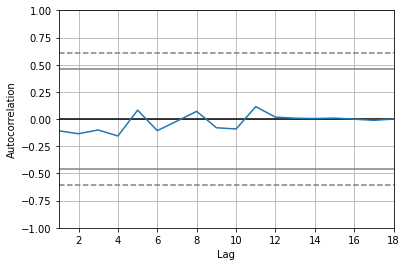

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


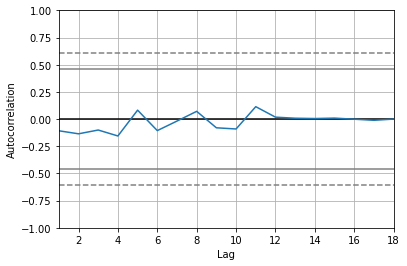

BIRRE
Fresco


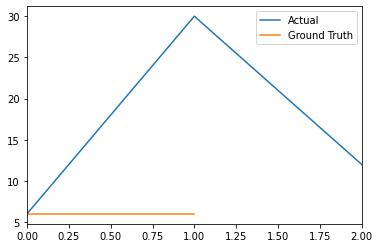

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


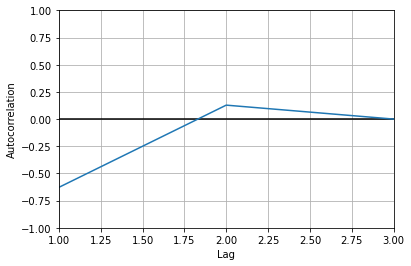

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


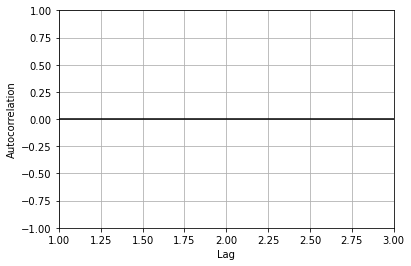

BIRRE
Seco
32.278524749436734


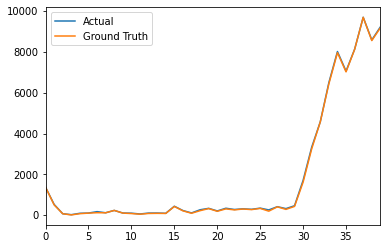

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


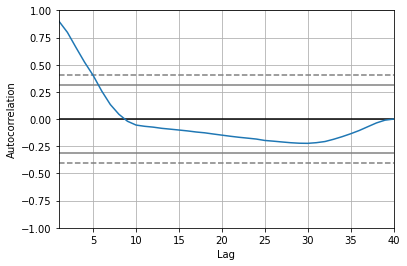

/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


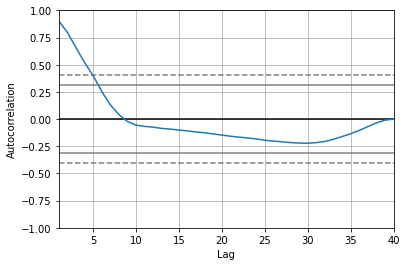

In [86]:
dfs_arima = []

for el in [formaggi_duri_filt, bufala_e_burrata_filt, pasta_fresca_filt, salumi_italiani_filt, formaggi_morbidi_filt, mozzarella_per_pizza_filt, birra_filt]:
    for i, j in el.groupby('Tipo de Producto'):
        print(j['Descripcion Sub-Familia Articulos'].unique()[0])
        print(i)
        el_no_dis = j[j['Descuento aplicado'] < 40]

        #fig, ax = plt.subplots(figsize=(5, 5), facecolor='white')

        df_tot = j.groupby(['year', 'month']).apply(
                lambda x: x['Cantidad Pedida'].sum()).reset_index()

        df_tot['year_month'] = df_tot['year'].astype(str) + '_' + df_tot['month'].astype(str)

        df_no_dis = el_no_dis.groupby(['year', 'month']).apply(
                lambda x: x['Cantidad Pedida'].sum()).reset_index()

        df_no_dis['year_month'] = df_no_dis['year'].astype(str) + '_' + df_no_dis['month'].astype(str)

        df_no_dis.drop(['year', 'month'], axis=1, inplace=True)
        df_tot.drop(['year', 'month'], axis=1, inplace=True)

        ax.plot(df_tot['year_month'].astype(str).tolist(), df_tot[0].values, lw=1, color='blue')
        ax.plot(df_no_dis['year_month'].astype(str).tolist(), df_no_dis[0].values, lw=1, color='orange')
        #import pdb;pdb.set_trace()
        try:
            rms = mean_squared_error(df_no_dis[0], df_tot[0], squared=False)
            print(rms)
        except:
            pass

        both = df_tot.merge(df_no_dis, on='year_month', how='outer')
        both.columns = ['Actual', 'Date', 'Ground Truth']

        dfs_arima.append((both, j['Descripcion Sub-Familia Articulos'].unique()[0], i))

        both.plot()
        pyplot.show()
        
        autocorrelation_plot(both['Actual'])
        pyplot.show()
        
        autocorrelation_plot(both['Ground Truth'])
        pyplot.show()

In [94]:
dfs_arima[13]

(      Actual     Date  Ground Truth
 0   1652.518   2015_1      1633.518
 1   1562.148   2015_2      1541.148
 2   1790.002   2015_3      1769.002
 3   1920.492   2015_4      1881.492
 4   1624.880   2015_5      1600.880
 5   1861.218   2015_6      1827.218
 6   1906.500   2015_7      1898.500
 7   1362.700   2015_8      1279.700
 8   2265.780   2015_9      1908.596
 9   2127.556  2015_10      1986.556
 10  2033.473  2015_11      1889.473
 11  2841.259  2015_12      2607.779
 12  2171.596   2016_1      1958.596
 13  2261.042   2016_2      1949.042
 14  3008.018   2016_3      2578.588
 15  2646.886   2016_4      2414.106
 16  2642.931   2016_5      2345.120
 17  2625.144   2016_6      2353.144
 18  2466.788   2016_7      2230.788
 19  2341.710   2016_8      2050.710
 20  2264.504   2016_9      2037.486
 21  2453.898  2016_10      2140.898
 22  2602.118  2016_11      2257.258
 23  3005.806  2016_12      2739.806
 24  2211.468   2017_1      1990.468
 25  2373.020   2017_2      2153.530
 

FORMAGGI DURI Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


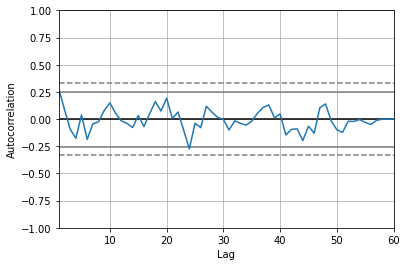

FORMAGGI DURI Seco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


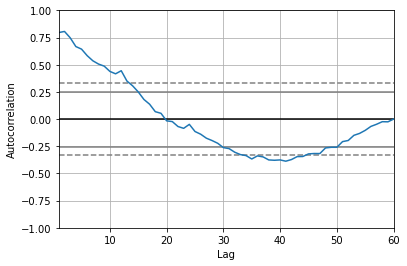

FORMAGGI DURI Ultra Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


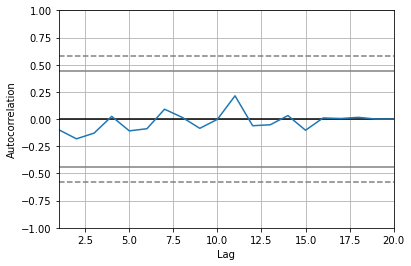

BUFALA E BURRATA Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


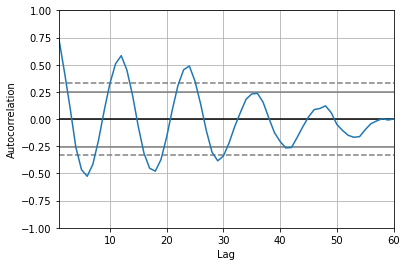

BUFALA E BURRATA Seco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


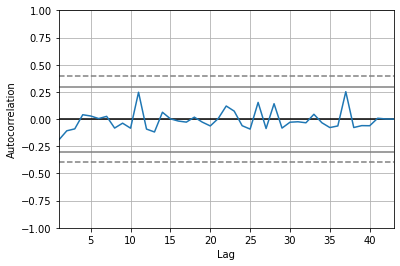

BUFALA E BURRATA Ultra Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


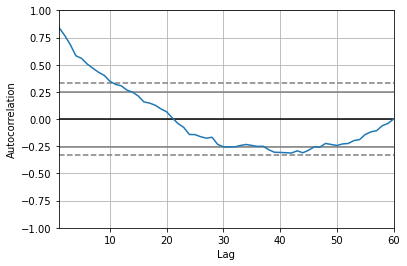

PASTA FRESCA Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


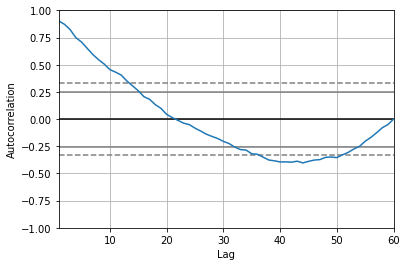

PASTA FRESCA Seco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


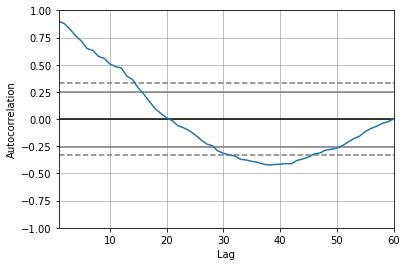

PASTA FRESCA Ultra Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


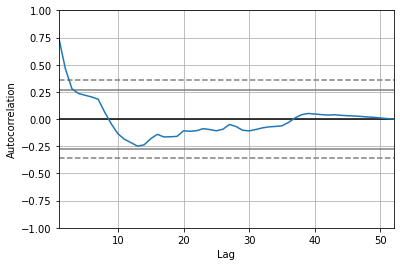

SALUMI ITALIANI Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


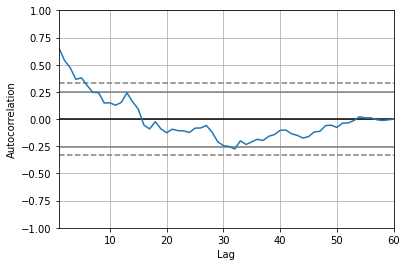

SALUMI ITALIANI Seco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


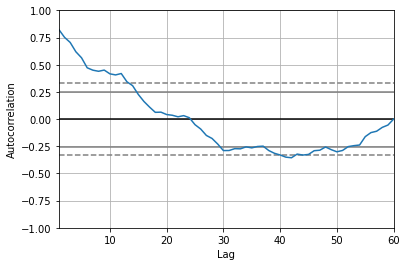

SALUMI ITALIANI Ultra Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


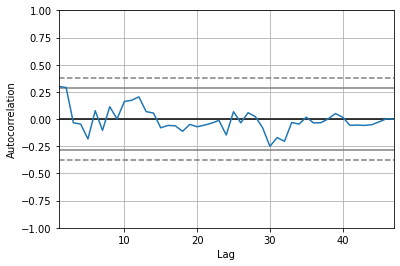

FORMAGGI MORBIDI Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


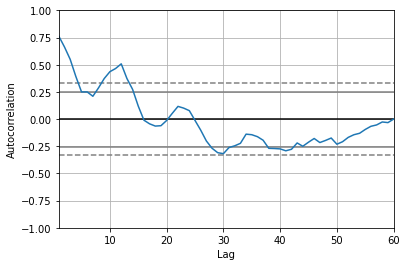

FORMAGGI MORBIDI Seco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


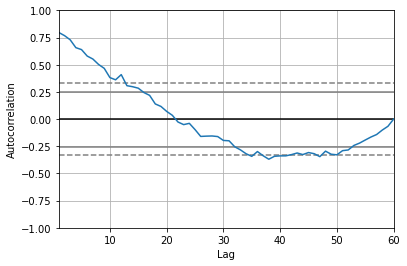

FORMAGGI MORBIDI Ultra Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


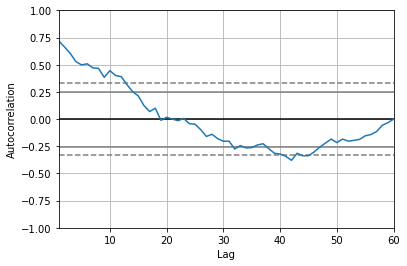

MOZZARELLA PER PIZZA Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


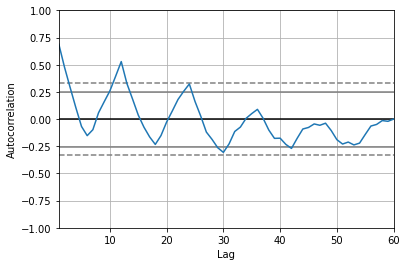

MOZZARELLA PER PIZZA Seco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


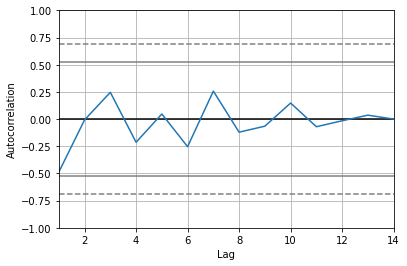

MOZZARELLA PER PIZZA Ultra Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


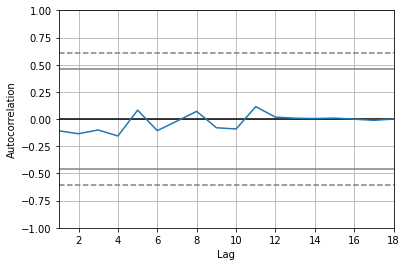

BIRRE Fresco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


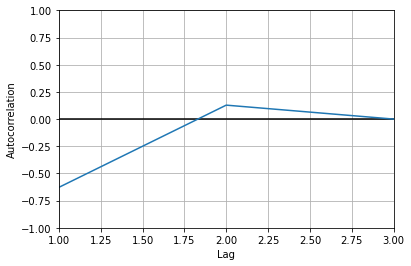

BIRRE Seco


/home/jbonet/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


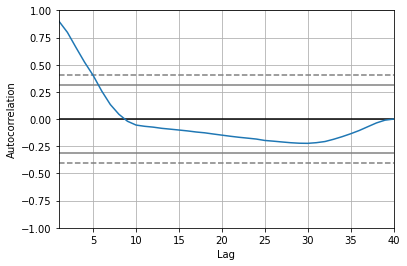

In [84]:
from pandas.plotting import autocorrelation_plot
for el in dfs_arima: 
    print(el[1], el[2])
    autocorrelation_plot(el[0]['Actual'])
    pyplot.show()

/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3711.657321, expected=3471.199000


/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3348.265871, expected=3295.875000


/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3990.882193, expected=4090.927000


/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3662.393051, expected=4301.709000


/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4166.336275, expected=4084.212000


/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4095.873657, expected=3768.115000


/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4397.009134, expected=4433.850000


/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4224.789594, expected=3713.583000


/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4297.093899, expected=3959.633000


/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4226.251915, expected=4781.591000


/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3821.213116, expected=3950.225000
predicted=4593.225976, expected=5184.542000
Test RMSE: 370.218
Actual RMSE: 589.730


/home/jbonet/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


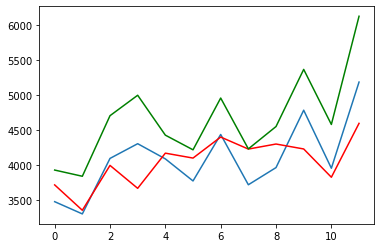

In [112]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

#series.index = series.index.to_period('M')
# split into train and test sets
X = dfs_arima[13][0]['Ground Truth'].values

size = 48
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(12,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
rmse = sqrt(mean_squared_error(test, dfs_arima[13][0]['Actual'].tolist()[48:]))
print('Actual RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.plot(dfs_arima[13][0]['Actual'].tolist()[48:], color='green')
pyplot.show()